# PREDICT THE CHURN RATE OF CUSTOMERS





**Name of Dataset :** Customer Churn

**Domain :** IT

**Target Variable :** Churn

**Size :** 7043 records and 20 variables

**Kaggle link :** https://www.kaggle.com/datasets/soheiltehranipour/it-customer-churn


## DATA COLLECTION

In [1]:
import pandas as pd
def collect(dataset):
    #loading our dataset
    df = pd.read_csv(dataset)
    return df
df_data = collect('churn.csv')

In [2]:
df_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


## DATA CLEANING

### Checking Data types.

In [3]:
def check_dtype(data):
    #checking data types of all columns to see any inconsistency in data
    return data.dtypes
check_dtype(df_data)

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

### Handling Missing Values.

In [4]:
def check_null(data):
    # checking null values in all columns
    return data.isnull().sum()
check_null(df_data)

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## DATA TRANSFORMATION

In [5]:
df_data['TotalCharges'] = pd.to_numeric(df_data['TotalCharges'],errors='coerce')

In [6]:
check_null(df_data['TotalCharges'])

11

In [7]:
df_data.dropna(subset=['TotalCharges'], inplace=True)

In [8]:
# converting 'Region_code' to categorical data.# converting all boolean columns to categorical data.

In [9]:
def convert_cat(data,col):
    for i in col:
        data[i] = data[i].astype('object')
    return data
df_data=convert_cat(df_data,['SeniorCitizen'])

### Separating Categorical and Numerical data.

We need to separate categorical and numerical variables to Normalize, Standardize and Perform EDA. 

In [10]:
def sep_col(data):
    # this function separates categorical and numerical columns of our data.
    categorical_columns = data.select_dtypes(include=['object']).columns
    numerical_columns = data.select_dtypes(exclude=['object']).columns
    return categorical_columns,numerical_columns
categorical_columns,numerical_columns=sep_col(df_data)

In [11]:
# accessing the categorical columns
categorical_columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [12]:
# # accessing the categorical columns
numerical_columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

### Label Encoding

In [13]:
# Making all the necessary imports.
from numpy import array
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [14]:
def encode(data):
    # this function standardize all categorical columns using builtin Python sklearn's LabelEncoder.
    for col in categorical_columns:
        data[col]=label_encoder.fit_transform(data[col])
    return data

balanced_data1=encode(df_data)

### Standardization (Using Z-Score)


In [15]:
# Making all necessary imports
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [16]:
def standardize(data):
    # This function standarizes all numerical columns using built in StandaedScaler
    for col_name in numerical_columns:
        data[col_name]=scaler.fit_transform(data[[col_name]]).round(2)
    return data
balanced_data1=standardize(df_data)

In [17]:
df_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.28,0,1,0,0,2,0,0,0,0,0,1,2,-1.16,-0.99,0
1,1,0,0,0,0.06,1,0,0,2,0,2,0,0,0,1,0,3,-0.26,-0.17,0
2,1,0,0,0,-1.24,1,0,0,2,2,0,0,0,0,0,1,3,-0.36,-0.96,1
3,1,0,0,0,0.51,0,1,0,2,0,2,2,0,0,1,0,0,-0.75,-0.20,0
4,0,0,0,0,-1.24,1,0,1,0,0,0,0,0,0,0,1,2,0.20,-0.94,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,-0.34,1,2,0,2,0,2,2,2,2,1,1,3,0.66,-0.13,0
7039,0,0,1,1,1.61,1,2,1,0,2,2,0,2,2,1,1,1,1.28,2.24,0
7040,0,0,1,1,-0.87,0,1,0,2,0,0,0,0,0,0,1,2,-1.17,-0.85,0
7041,1,1,1,0,-1.16,1,2,1,0,0,0,0,0,0,0,1,3,0.32,-0.87,1


## Checking if the dataset selected is Imbalanced or not.


In [18]:
import numpy as np 
from scipy.stats import norm,chisquare 
import matplotlib.pyplot as plt
X = df_data.drop(columns=['Churn'])
y = df_data['Churn']

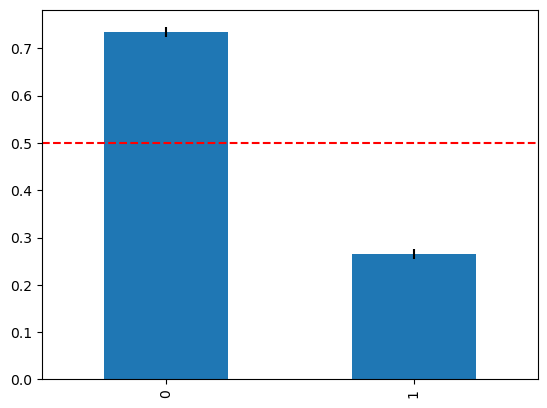

In [19]:
freqs =pd.Series(y).value_counts() /len(y) 
std_errors = np.sqrt(freqs*(1-freqs)/len(y)) 
expected_frequency = 1/len(np.unique(y)) 
freqs.plot(kind='bar',yerr=std_errors*1.96) 
plt.axhline(expected_frequency,color='red',linestyle='--')


Since the frequency for both the classes(length of the bar) is far from what we expected (the red line), we are only 5% confident that the dataset is balanced which is quite less. Hence we can say that the dataset is imbalanced and we can further in our evaluation.

# BASELINE EXECUTION

### 1. Gradient Boosting Machine

In [20]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve, accuracy_score

def fit_model_GBM(data, target):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Initialize the XGBoost classifier
    xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=6, random_state=42)

    # Fit the model to the training data
    xgb_classifier.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = xgb_classifier.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred,average='weighted')
    recall_train = recall_score(y_train, y_train_pred,average='weighted')
    f1_train = f1_score(y_train, y_train_pred,average='weighted')
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # Make predictions on the validation set
    y_val_pred = xgb_classifier.predict(X_val)

    # Evaluate the model's performance on the validation set
    precision_val = precision_score(y_val, y_val_pred,average='weighted')
    recall_val = recall_score(y_val, y_val_pred,average='weighted')
    f1_val = f1_score(y_val, y_val_pred,average='weighted')
    accuracy_val = accuracy_score(y_val, y_val_pred)

    # Make predictions on the test set
    y_test_pred = xgb_classifier.predict(X_test)

    # Evaluate the model's performance on the test set
    precision_test = precision_score(y_test, y_test_pred,average='weighted', zero_division=1)
    recall_test = recall_score(y_test, y_test_pred,average='weighted')
    f1_test = f1_score(y_test, y_test_pred,average='weighted')
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Calculate AUC-ROC
    y_test_proba = xgb_classifier.predict_proba(X_test)[:, 1]  # Probability of positive class
    auc_roc = roc_auc_score(y_test, y_test_proba)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)
    
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {auc_roc}")
    print(f"AUC-PR: {auc_pr}")

# Example usage
fit_model_GBM(df_data, 'Churn')


Train Accuracy: 0.9613652524294857
Validation Accuracy: 0.7773826458036984
Test Accuracy: 0.775408670931059


Train Precision: 0.9611852580514693
Validation Precision: 0.7672144560680043
Test Precision: 0.7685864370245793


Train Recall: 0.9613652524294857
Validation Recall: 0.7773826458036984
Test Recall: 0.775408670931059


Train F1 Score: 0.9612392877026472
Validation F1 Score: 0.770630671449597
Test F1 Score: 0.7714342608301896


AUC-ROC: 0.8175566364429405
AUC-PR: 0.6011509334532241


### 2. Logistic Regression

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc, accuracy_score

def fit_model_LR(data, target):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Instantiate the Logistic Regression model
    log_reg_model = LogisticRegression(max_iter=1000)

    # Fit the model to the training data
    log_reg_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = log_reg_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')

    # Make predictions on the validation set
    y_val_pred = log_reg_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')

    # Make predictions on the test set
    y_test_pred = log_reg_model.predict(X_test)

    # Evaluate the model's performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')

    # Calculate AUC-ROC
    y_test_proba = log_reg_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    auc_roc = roc_auc_score(y_test, y_test_proba)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)
    
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {auc_roc}")
    print(f"AUC-PR: {auc_pr}")

fit_model_LR(df_data, 'Churn')

Train Accuracy: 0.8018487793315952
Validation Accuracy: 0.8008534850640113
Test Accuracy: 0.8052594171997157


Train Precision: 0.7943115614065004
Validation Precision: 0.7894535429700776
Test Precision: 0.7990432529797418


Train Recall: 0.8018487793315952
Validation Recall: 0.8008534850640113
Test Recall: 0.8052594171997157


Train F1 Score: 0.7966285279463744
Validation F1 Score: 0.7905191892933892
Test F1 Score: 0.8013937981852302


AUC-ROC: 0.850341008221206
AUC-PR: 0.6558359779878646


### 3. Decision Trees

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

def fit_model_DT(data, target):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is spit into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Instantiate the Decision Tree classifier
    dt_model = DecisionTreeClassifier(random_state=42)

    # Fit the model to the training data
    dt_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = dt_model.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred,average='weighted')
    recall_train = recall_score(y_train, y_train_pred,average='weighted')
    f1_train = f1_score(y_train, y_train_pred,average='weighted')
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # Make predictions on the validation set
    y_val_pred = dt_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    accuracy_val = accuracy_score(y_val, y_val_pred)

    # Make predictions on the test set
    y_test_pred = dt_model.predict(X_test)

    # Evaluate the model's performance on the test set
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred,  average='weighted')
    f1_test = f1_score(y_test, y_test_pred,  average='weighted')
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Calculate AUC-ROC
    y_test_proba = dt_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    auc_roc = roc_auc_score(y_test, y_test_proba)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)

    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {auc_roc}")
    print(f"AUC-PR: {auc_pr}")

# Example usage
fit_model_DT(df_data, 'Churn')


Train Accuracy: 0.9940744252192463
Validation Accuracy: 0.7155049786628734
Test Accuracy: 0.7313432835820896


Train Precision: 0.9940872958652445
Validation Precision: 0.7155049786628734
Test Precision: 0.7392926727899082


Train Recall: 0.9940744252192463
Validation Recall: 0.7155049786628734
Test Recall: 0.7313432835820896


Train F1 Score: 0.9940602129959448
Validation F1 Score: 0.7155049786628734
Test F1 Score: 0.7349404580595564


AUC-ROC: 0.6681633138597372
AUC-PR: 0.5613711488204454


### 4. Random Forest

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve, accuracy_score

def fit_model_RF(data, target):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Instantiate the Random Forest model
    rf_model = RandomForestClassifier(n_estimators=30, max_depth=10, max_samples=0.8, n_jobs=-1, random_state=42)

    # Fit the model to the training data
    rf_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = rf_model.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred,average='weighted')
    recall_train = recall_score(y_train, y_train_pred,average='weighted')
    f1_train = f1_score(y_train, y_train_pred,average='weighted')
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # Make predictions on the validation set
    y_val_pred = rf_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    precision_val = precision_score(y_val, y_val_pred,average='weighted')
    recall_val = recall_score(y_val, y_val_pred,average='weighted')
    f1_val = f1_score(y_val, y_val_pred,average='weighted')
    accuracy_val = accuracy_score(y_val, y_val_pred)

    # Make predictions on the test set
    y_test_pred = rf_model.predict(X_test)

    # Evaluate the model's performance on the test set
    precision_test = precision_score(y_test, y_test_pred,average='weighted', zero_division=1)
    recall_test = recall_score(y_test, y_test_pred,average='weighted')
    f1_test = f1_score(y_test, y_test_pred,average='weighted')
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Calculate AUC-ROC
    y_test_proba = rf_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    auc_roc = roc_auc_score(y_test, y_test_proba)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)
    
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {auc_roc}")
    print(f"AUC-PR: {auc_pr}")

# Example usage
fit_model_RF(df_data, 'Churn')


Train Accuracy: 0.8876511021569092
Validation Accuracy: 0.7951635846372689
Test Accuracy: 0.7938877043354655


Train Precision: 0.8852502763525912
Validation Precision: 0.7828807812059674
Test Precision: 0.7851904816580981


Train Recall: 0.8876511021569092
Validation Recall: 0.7951635846372689
Test Recall: 0.7938877043354655


Train F1 Score: 0.8848117683536236
Validation F1 Score: 0.7842603372821292
Test F1 Score: 0.7881773170395359


AUC-ROC: 0.8353036030558566
AUC-PR: 0.6473418668445394


### 5. MultiLayer Perceptron

In [24]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, precision_recall_curve, auc, accuracy_score

def fit_model_MLP(data, target):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Instantiate the MLP model
    mlp_model = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', learning_rate='constant', learning_rate_init=0.01, max_iter=1000)

    # Fit the model to the training data
    mlp_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = mlp_model.predict(X_train)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    accuracy_train = accuracy_score(y_train, y_train_pred)

    # Make predictions on the validation set
    y_val_pred = mlp_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    accuracy_val = accuracy_score(y_val, y_val_pred)

    # Make predictions on the test set
    y_test_pred = mlp_model.predict(X_test)

    # Evaluate the model's performance on the test set
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted')
    accuracy_test = accuracy_score(y_test, y_test_pred)

    # Calculate AUC-ROC
    y_test_proba = mlp_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    auc_roc = roc_auc_score(y_test, y_test_proba)
    
    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)
    
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {auc_roc}")
    print(f"AUC-PR: {auc_pr}")

# Example usage
fit_model_MLP(df_data, 'Churn')


Train Accuracy: 0.7940270206210003
Validation Accuracy: 0.7972972972972973
Test Accuracy: 0.8045486851457001


Train Precision: 0.7864510793086998
Validation Precision: 0.7860698954271422
Test Precision: 0.7998525738040455


Train Recall: 0.7940270206210003
Validation Recall: 0.7972972972972973
Test Recall: 0.8045486851457001


Train F1 Score: 0.7890041252560671
Validation F1 Score: 0.7879680207811663
Test F1 Score: 0.8018083680087911


AUC-ROC: 0.8480676200798329
AUC-PR: 0.650200437341657


**Comment :** 

Despite the fact that the dataset is quite imbalanced, we see a considerably good performance of Logistic Regression and Random Forest. This shows that numbers can be misleading since an imbalanced dataset favors majority class and too good of a score does not indicate a good model. This is verified by looking at Low AUC-ROC and low AUC-PR scores through out. 

XGBoost, Decision Trees and Multilayer perceptron overfitted on training data which is understandable however, the performance significantly dropped in traning and validation datasets. 

Hence none of the models performed well and it goes on to show that handling imbalance is crucial in creating a well generalised model.



### Balancing the Dataset:

# CI Technique 1: RANDOM  OVERSAMPLING

In [21]:
import pandas as pd
import pandas as pd
from sklearn.utils import resample

# Random oversampling
def random_oversample(data, label):
    # Separate majority and minority classes
    majority_class = data[data[label] == 0]
    minority_class = data[data[label] == 1]
    
    # Upsample minority class
    minority_upsampled = resample(minority_class, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(majority_class),  # to match majority class
                                 random_state=42) # reproducible results
    
    # Combine majority class with upsampled minority class
    upsampled_data = pd.concat([majority_class, minority_upsampled])
    
    return upsampled_data

# Apply random oversampling
balanced_data1 = random_oversample(df_data, 'Churn')

# Check the class distribution
print(balanced_data1['Churn'].value_counts())



0    5163
1    5163
Name: Churn, dtype: int64


By Random Oversampling the size of dataset from 7000+ rows to 10000+ rows.

In [22]:
import numpy as np 
from scipy.stats import norm,chisquare 
import matplotlib.pyplot as plt
X = balanced_data1.drop(columns=['Churn'])
y = balanced_data1['Churn']

### Checking if the dataset has become balanced

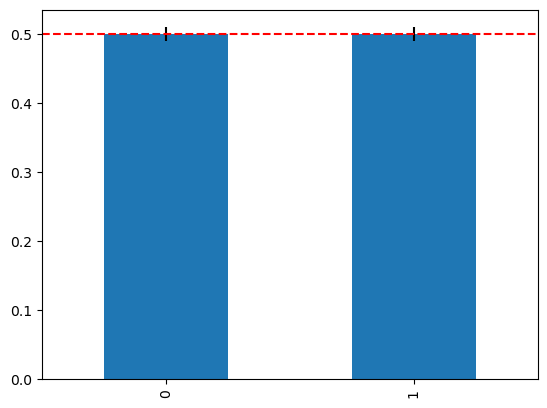

In [27]:
freqs =pd.Series(y).value_counts() /len(y) 
std_errors = np.sqrt(freqs*(1-freqs)/len(y)) 
expected_frequency = 1/len(np.unique(y)) 
freqs.plot(kind='bar',yerr=std_errors*1.96) 
plt.axhline(expected_frequency,color='red',linestyle='--')

In [28]:
balanced_data1

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.28,0,1,0,0,2,0,0,0,0,0,1,2,-1.16,-0.99,0
1,1,0,0,0,0.06,1,0,0,2,0,2,0,0,0,1,0,3,-0.26,-0.17,0
3,1,0,0,0,0.51,0,1,0,2,0,2,2,0,0,1,0,0,-0.75,-0.20,0
6,1,0,0,1,-0.42,1,2,1,0,2,0,0,2,0,0,1,1,0.81,-0.15,0
7,0,0,0,0,-0.91,0,1,0,2,0,0,0,0,0,0,0,3,-1.17,-0.87,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2323,0,0,0,0,-0.14,1,2,1,0,0,2,0,2,2,0,1,1,1.12,0.29,1
4499,0,0,0,1,-0.83,1,2,1,2,0,0,0,0,0,0,1,2,0.45,-0.61,1
3384,0,0,1,1,-1.16,1,0,1,0,0,2,0,0,0,0,1,2,0.30,-0.86,1
1327,1,0,1,0,1.08,1,2,1,0,0,2,0,2,2,1,1,0,1.15,1.62,1


## Model Selection
## **ALGORITHM 1: Gradient Boosting Machine**

### Manual Splitting:

In [33]:
fit_model_GBM(balanced_data1, 'Churn')

Train Accuracy: 0.954317998385795
Validation Accuracy: 0.836319612590799
Test Accuracy: 0.8523717328170377


Train Precision: 0.9554266940456195
Validation Precision: 0.8454837522992029
Test Precision: 0.8610199221446315


Train Recall: 0.954317998385795
Validation Recall: 0.836319612590799
Test Recall: 0.8523717328170377


Train F1 Score: 0.9542725399317618
Validation F1 Score: 0.8356775304319229
Test F1 Score: 0.8516904753513139


AUC-ROC: 0.9151591673673387
AUC-PR: 0.887909756343597


**Comment :** The model's performance has improved quite a lot. The increase in the value of AUC-PR specifically indicates good performance. Training data may hint at overfitting though.

### Cross-Validation:

In [34]:
import numpy as np
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

def fit_model_GBM_cv(data, target, KF):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # Number of folds for cross-validation
    num_folds = KF

    # Initialize variables to store overall metrics
    overall_accuracy = 0
    overall_precision = 0
    overall_recall = 0
    overall_f1 = 0
    overall_auc = 0

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize the XGBoost classifier
        xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=6, random_state=42)

        # Fit the model to the training data
        xgb_classifier.fit(X_train, y_train)

        # Make predictions on the test set
        y_pred = xgb_classifier.predict(X_test)

        # Calculate metrics for this fold
        fold_accuracy = accuracy_score(y_test, y_pred)
        fold_precision = precision_score(y_test, y_pred,average='weighted')
        fold_recall = recall_score(y_test, y_pred,average='weighted')
        fold_f1 = f1_score(y_test, y_pred,average='weighted')
        fold_auc = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])

        print(f"Fold {fold}:")
        print(f"  Accuracy: {fold_accuracy}")
        print(f"  Precision: {fold_precision}")
        print(f"  Recall: {fold_recall}")
        print(f"  F1 Score: {fold_f1}")
        print(f"  AUC: {fold_auc}")

        # Add fold metrics to overall metrics
        overall_accuracy += fold_accuracy
        overall_precision += fold_precision
        overall_recall += fold_recall
        overall_f1 += fold_f1
        overall_auc += fold_auc

    # Calculate and print average metrics across all folds
    average_accuracy = overall_accuracy / num_folds
    average_precision = overall_precision / num_folds
    average_recall = overall_recall / num_folds
    average_f1 = overall_f1 / num_folds
    average_auc = overall_auc / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision: {average_precision}")
    print(f"  Average Recall: {average_recall}")
    print(f"  Average F1 Score: {average_f1}")
    print(f"  Average AUC: {average_auc}")

# Example usage
fit_model_GBM_cv(balanced_data1, 'Churn', 10)


Fold 1:
  Accuracy: 0.8760890609874153
  Precision: 0.8810813207524317
  Recall: 0.8760890609874153
  F1 Score: 0.8757989537046457
  AUC: 0.9295092907812055
Fold 2:
  Accuracy: 0.8489835430784124
  Precision: 0.8614999284892799
  Recall: 0.8489835430784124
  F1 Score: 0.8483965284655297
  AUC: 0.9266865750131471
Fold 3:
  Accuracy: 0.8489835430784124
  Precision: 0.8595302389565393
  Recall: 0.8489835430784124
  F1 Score: 0.8476059063081547
  AUC: 0.9257630296212973
Fold 4:
  Accuracy: 0.8528557599225557
  Precision: 0.8660064429616722
  Recall: 0.8528557599225557
  F1 Score: 0.8522452843265617
  AUC: 0.9318458417849899
Fold 5:
  Accuracy: 0.8896418199419167
  Precision: 0.8967033999809916
  Recall: 0.8896418199419167
  F1 Score: 0.889268111067439
  AUC: 0.9582983398071357
Fold 6:
  Accuracy: 0.8712487899322362
  Precision: 0.8758040918724477
  Recall: 0.8712487899322362
  F1 Score: 0.870414659319334
  AUC: 0.9266727290490827
Fold 7:
  Accuracy: 0.8662790697674418
  Precision: 0.872170

### Feature Selection

## Feature Engineering

### Correlation

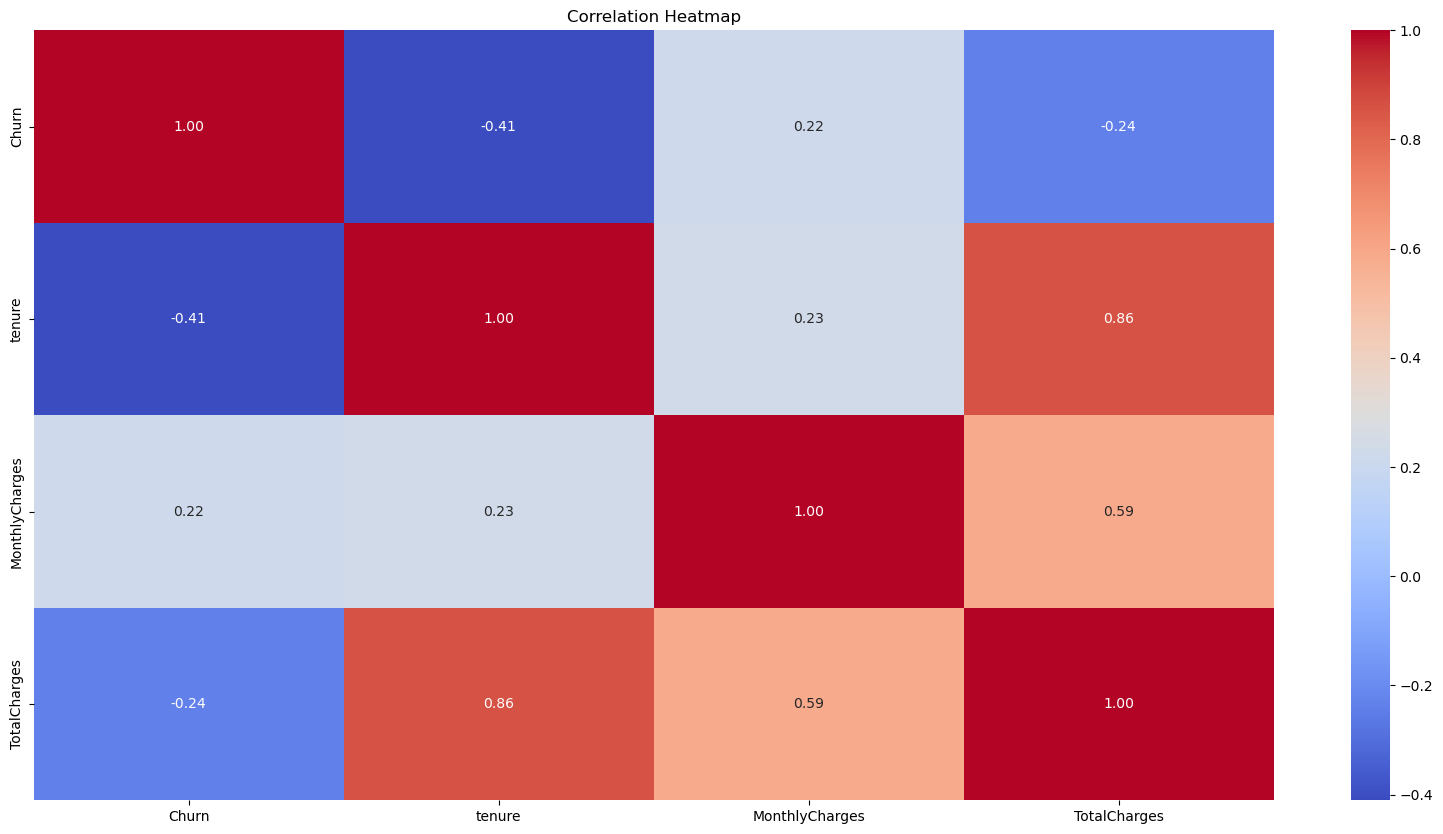

In [35]:
 def feature_eng(data,target,df):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Assuming 'target_column' is your target variable and 'feature_columns' are your feature columns
    target_column = target
    feature_columns = df

    # Extract the subset of data containing only the features and the target variable
    data_subset = data[[target_column] + feature_columns]

    # Calculate the correlation matrix
    correlation_matrix = data_subset.corr()

    # Plot the heatmap
    plt.figure(figsize=(20, 10))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

feature_eng(balanced_data1,'Churn',numerical_columns.to_list())

None of the variables as correlated hence correlation is not useful here.

### Variance Thresholding

In [37]:
def select_features_variance_threshold(dataset, threshold=0.0):
    
    import pandas as pd
    from sklearn.feature_selection import VarianceThreshold
    # Remove target variable from the data set.
    X = dataset.drop(columns=['Churn']) 
    
    # Initialize VarianceThreshold object
    selector = VarianceThreshold(threshold=threshold)
    
    # Fit the selector to the data and transform the feature matrix
    X_selected = selector.fit_transform(X)
    
    # Get the indices of the selected features
    selected_indices = selector.get_support(indices=True)
    
    # Get the names of the selected features
    selected_features = X.columns[selected_indices].tolist()
    
    return selected_indices, selected_features

selected_indices, selected_features=select_features_variance_threshold(balanced_data1, threshold=0.7)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [ 4  6  8  9 10 11 12 13 16 17 18]
Selected features: ['tenure', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [38]:
selected_features.append('Churn')
var_thrsh_data=balanced_data1[selected_features]
fit_model_GBM(var_thrsh_data,'Churn')

Train Accuracy: 0.9399515738498789
Validation Accuracy: 0.8174334140435835
Test Accuracy: 0.8339787028073572


Train Precision: 0.9411140645874071
Validation Precision: 0.8245150638918759
Test Precision: 0.839405581299571


Train Recall: 0.9399515738498789
Validation Recall: 0.8174334140435835
Test Recall: 0.8339787028073572


Train F1 Score: 0.9398873377020893
Validation F1 Score: 0.816898601551262
Test F1 Score: 0.833508430139976


AUC-ROC: 0.9012211845715308
AUC-PR: 0.8709719036575312


**Comment :** Performance is quite similar to what it was before.~

### Wrapper Method 

#### Recursive Feature Elimination

In [39]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

def select_features_rfe(data, target, n_features_to_select):
    X = data.drop(columns=[target]).values
    y = data[target].values
    # Initialize the logistic regression model
    estimator = LogisticRegression(max_iter=1000)

    # Initialize the RFE selector
    selector = RFE(estimator, n_features_to_select=n_features_to_select)

    # Fit the RFE selector to the data
    selector = selector.fit(X, y)

    # Get the indices of the selected features
    selected_indices = selector.support_

    # Get the names of the selected features
    feature_names = data.drop(columns=[target]).columns.tolist()
    wrp_selected_features = [feature_names[i] for i, selected in enumerate(selected_indices) if selected]
    
    return wrp_selected_features


# Perform feature selection using RFE
rfe_selected_features = select_features_rfe(balanced_data1, 'Churn', 3)

# Print the selected features
print("Selected features:", rfe_selected_features)

Selected features: ['PhoneService', 'Contract', 'MonthlyCharges']


In [40]:
rfe_selected_features.append('Churn')
wrapper_data_rfe=balanced_data1[rfe_selected_features]
fit_model_GBM(wrapper_data_rfe,'Churn')

Train Accuracy: 0.7815980629539951
Validation Accuracy: 0.7506053268765133
Test Accuracy: 0.749757986447241


Train Precision: 0.7877375330334943
Validation Precision: 0.7645591597992565
Test Precision: 0.7620593809262544


Train Recall: 0.7815980629539951
Validation Recall: 0.7506053268765133
Test Recall: 0.749757986447241


Train F1 Score: 0.7800911155944654
Validation F1 Score: 0.7484066913349682
Test F1 Score: 0.7473853707596122


AUC-ROC: 0.8083355126809912
AUC-PR: 0.7335552500756577


**Comment :** RFE has reduced the performance however the generalizibility has increased as metrixs consistent over train-val-test.

#### Forward Feature Selection

In [41]:
def select_features_wrapper_ols(data, target, n_features_to_select):
    from sklearn.feature_selection import SequentialFeatureSelector
    from sklearn.linear_model import LogisticRegression
    
    X = data.drop(columns=[target]).values
    y = data[target].values
    
    # Initialize the Logistic regression model
    estimator = LogisticRegression()

    # Initialize the RFE selector without cross-validation
    selector = SequentialFeatureSelector(estimator, n_features_to_select=n_features_to_select,direction='forward')

    # Fit the RFE selector to the data
    selector = selector.fit(X, y)

    # Get the indices of the selected features
    selected_indices = selector.support_

    # Get the names of the selected features
    feature_names = data.drop(columns=[target]).columns.tolist()
    ffs_selected_features = [feature_names[i] for i, selected in enumerate(selected_indices) if selected]
    
    return ffs_selected_features

# Perform feature selection using wrapper method (RFE without cross-validation and OLS estimator)
ffs_selected_features = select_features_wrapper_ols(balanced_data1, 'Churn', 4)
# Print the selected features
print("Selected features using OLS:", ffs_selected_features)

Selected features using OLS: ['tenure', 'Contract', 'MonthlyCharges', 'TotalCharges']


In [42]:
ffs_selected_features.append('Churn')
wrapper_data_ffs=balanced_data1[ffs_selected_features]
fit_model_GBM(wrapper_data_ffs,'Churn')

Train Accuracy: 0.9000807102502018
Validation Accuracy: 0.8096852300242131
Test Accuracy: 0.8049370764762827


Train Precision: 0.9031825974056125
Validation Precision: 0.8177961788640014
Test Precision: 0.8142099324048468


Train Recall: 0.9000807102502018
Validation Recall: 0.8096852300242131
Test Recall: 0.8049370764762827


Train F1 Score: 0.8998143744766509
Validation F1 Score: 0.8089969940918357
Test F1 Score: 0.8038171052175336


AUC-ROC: 0.881753282847456
AUC-PR: 0.8511571356446526


**Comment :** RFE is not a good feature seletor as although the model has performed considerably wellon training data, the drop in the performance from training to testing dataset is a cause of concern and hint at low generalizibility. Nevertheless, AUC-PR is good so it handles imbalance well.

### Principal Component Analysis

In [43]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np

def perform_pca(data,target):
    # Drop the target variable 'Status' if it's included in the DataFrame
    X = data.drop(target, axis=1)

    # Instantiate PCA
    pca = PCA()

    # Fit the PCA model with the standardized data
    pca.fit(X)

    # Transform the data onto the new feature space
    X_pca = pca.transform(X)
    
    # Convert X_pca to DataFrame
    X_pca_df = pd.DataFrame(X_pca, columns=[f'PC{i+1}' for i in range(X_pca.shape[1])])


    # You can access the explained variance ratio of each principal component
    explained_variance_ratio = pca.explained_variance_ratio_

    # Plot cumulative explained variance
    cumulative_variance = np.cumsum(explained_variance_ratio)
    plt.plot(range(1, len(cumulative_variance)+1), cumulative_variance, marker='o', linestyle='-')
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.title('Cumulative Explained Variance by Number of Components')
    plt.grid(True)
    plt.show()

    return X_pca_df

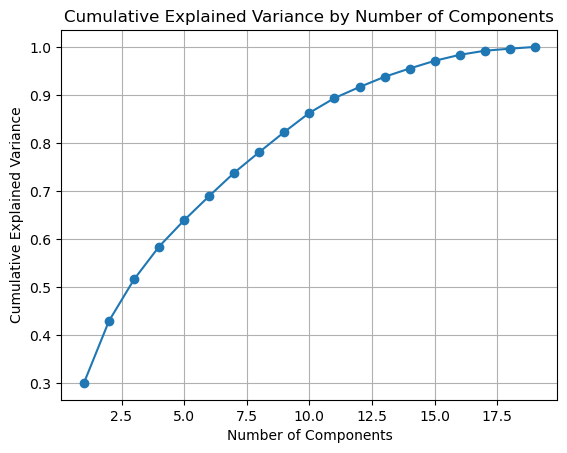

In [44]:
X_pca_df=perform_pca(balanced_data1,'Churn')

In [45]:
X_pca_df = X_pca_df.merge(balanced_data1[['Churn']], left_index=True, right_index=True)
fit_model_GBM(X_pca_df,'Churn')

Train Accuracy: 0.9548022598870056
Validation Accuracy: 0.7709443099273607
Test Accuracy: 0.755566311713456


Train Precision: 0.9550056040279215
Validation Precision: 0.7722509815667711
Test Precision: 0.7597577382404498


Train Recall: 0.9548022598870056
Validation Recall: 0.7709443099273607
Test Recall: 0.755566311713456


Train F1 Score: 0.9547954962086244
Validation F1 Score: 0.7706301389057654
Test F1 Score: 0.7548704217504031


AUC-ROC: 0.8188623413969347
AUC-PR: 0.8204780237173808


**Comment :** Low generalizibility as performance drops from training to testing. Handles imbalance well as AUC score is good.

## INTERPRETATION:
The model seems to be overfitting but with feature selection methods like Wrappers RFE the generaliziility has increased though compromise has to be done on performance for that. AUC score iss good through out showing that it handled imbalance well.

# ALGORITHM 2: Logistic Regression

### Manual Splitting:

In [46]:
fit_model_LR(balanced_data1, 'Churn')

Train Accuracy: 0.7672316384180791
Validation Accuracy: 0.7569007263922518
Test Accuracy: 0.7579864472410455


Train Precision: 0.7686075160068697
Validation Precision: 0.7612112363137541
Test Precision: 0.7628776862242774


Train Recall: 0.7672316384180791
Validation Recall: 0.7569007263922518
Test Recall: 0.7579864472410455


Train F1 Score: 0.7667414561586479
Validation F1 Score: 0.756483055928192
Test F1 Score: 0.7572095852099306


AUC-ROC: 0.8385539254972428
AUC-PR: 0.8222627665612213


### Cross-Validation:

In [47]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score

def fit_model_LR_CV(data, target, KF):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target]).values
    y = data[target_column_name].values

    # Number of folds for cross-validation
    num_folds = KF

    # Create Logistic Regression classifier
    log_reg = LogisticRegression(max_iter=1000)

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_accuracy = 0
    overall_precision_pos = 0
    overall_precision_neg = 0
    overall_recall_pos = 0
    overall_recall_neg = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Logistic Regression model
        log_reg.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = log_reg.predict(X_test)

        # Calculate metrics for this fold
        fold_accuracy = accuracy_score(y_test, predictions)
        fold_precision_pos = precision_score(y_test, predictions, pos_label=1)
        fold_precision_neg = precision_score(y_test, predictions, pos_label=0)
        fold_recall_pos = recall_score(y_test, predictions, pos_label=1)
        fold_recall_neg = recall_score(y_test, predictions, pos_label=0)
        fold_f1_pos = f1_score(y_test, predictions, pos_label=1)
        fold_f1_neg = f1_score(y_test, predictions, pos_label=0)
        fold_auc = roc_auc_score(y_test, log_reg.predict_proba(X_test)[:, 1])

        print(f"Fold {fold}:")
        print(f"  Accuracy: {fold_accuracy}")
        print(f"  Precision (Positive): {fold_precision_pos}")
        print(f"  Precision (Negative): {fold_precision_neg}")
        print(f"  Recall (Positive): {fold_recall_pos}")
        print(f"  Recall (Negative): {fold_recall_neg}")
        print(f"  F1 Score (Positive): {fold_f1_pos}")
        print(f"  F1 Score (Negative): {fold_f1_neg}")
        print(f"  AUC: {fold_auc}")

        # Add fold metrics to overall metrics
        overall_accuracy += fold_accuracy
        overall_precision_pos += fold_precision_pos
        overall_precision_neg += fold_precision_neg
        overall_recall_pos += fold_recall_pos
        overall_recall_neg += fold_recall_neg
        overall_f1_pos += fold_f1_pos
        overall_f1_neg += fold_f1_neg
        overall_auc += fold_auc

    # Calculate and print average metrics across all folds
    average_accuracy = overall_accuracy / num_folds
    average_precision_pos = overall_precision_pos / num_folds
    average_precision_neg = overall_precision_neg / num_folds
    average_recall_pos = overall_recall_pos / num_folds
    average_recall_neg = overall_recall_neg / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc = overall_auc / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision (Positive): {average_precision_pos}")
    print(f"  Average Precision (Negative): {average_precision_neg}")
    print(f"  Average Recall (Positive): {average_recall_pos}")
    print(f"  Average Recall (Negative): {average_recall_neg}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC: {average_auc}")

# Example usage
fit_model_LR_CV(balanced_data1, 'Churn', 10)


Fold 1:
  Accuracy: 0.7860600193610843
  Precision (Positive): 0.7627737226277372
  Precision (Negative): 0.8123711340206186
  Recall (Positive): 0.8212180746561886
  Recall (Negative): 0.7519083969465649
  F1 Score (Positive): 0.7909176915799432
  F1 Score (Negative): 0.7809712586719524
  AUC: 0.863169063723211
Fold 2:
  Accuracy: 0.7434656340755083
  Precision (Positive): 0.7043010752688172
  Precision (Negative): 0.7894736842105263
  Recall (Positive): 0.7971602434077079
  Recall (Negative): 0.6944444444444444
  F1 Score (Positive): 0.7478591817316841
  F1 Score (Negative): 0.7389162561576355
  AUC: 0.8292671474720156
Fold 3:
  Accuracy: 0.7521781219748306
  Precision (Positive): 0.7339130434782609
  Precision (Negative): 0.7751091703056768
  Recall (Positive): 0.8038095238095239
  Recall (Negative): 0.6988188976377953
  F1 Score (Positive): 0.7672727272727272
  F1 Score (Negative): 0.7349896480331263
  AUC: 0.8384795650543682
Fold 4:
  Accuracy: 0.7492739593417231
  Precision (Posi

## Feature Engineering

### Variance Thresholding

In [48]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data1, threshold=0.8)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [ 4  6 12 13 16 17 18]
Selected features: ['tenure', 'MultipleLines', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [49]:
selected_features.append('Churn')
var_thrsh_data=balanced_data1[selected_features]
fit_model_LR(var_thrsh_data,'Churn')

Train Accuracy: 0.7380145278450363
Validation Accuracy: 0.7210653753026635
Test Accuracy: 0.7090997095837367


Train Precision: 0.7380609586326594
Validation Precision: 0.7223423205902079
Test Precision: 0.7112118915547205


Train Recall: 0.7380145278450363
Validation Recall: 0.7210653753026635
Test Recall: 0.7090997095837367


Train F1 Score: 0.7379294775389154
Validation F1 Score: 0.7210532085080653
Test F1 Score: 0.708712741567123


AUC-ROC: 0.7977302914326796
AUC-PR: 0.7890000368433999


### Wrapper Method 

#### Recursive Feature Elimination

In [50]:
fit_model_LR(wrapper_data_rfe,'Churn')

Train Accuracy: 0.744955609362389
Validation Accuracy: 0.7404358353510896
Test Accuracy: 0.7376573088092934


Train Precision: 0.7512324310106974
Validation Precision: 0.7526930368742899
Test Precision: 0.7499976269916112


Train Recall: 0.744955609362389
Validation Recall: 0.7404358353510896
Test Recall: 0.7376573088092934


Train F1 Score: 0.7428842534591997
Validation F1 Score: 0.7384053312849125
Test F1 Score: 0.7350427186912986


AUC-ROC: 0.7913305081488855
AUC-PR: 0.7177234210221882


#### Forward Feature Selection

In [51]:
fit_model_LR(wrapper_data_ffs,'Churn')

Train Accuracy: 0.7602905569007264
Validation Accuracy: 0.7486682808716707
Test Accuracy: 0.7366892545982575


Train Precision: 0.7665662546933522
Validation Precision: 0.7608986589503745
Test Precision: 0.7487642811921997


Train Recall: 0.7602905569007264
Validation Recall: 0.7486682808716707
Test Recall: 0.7366892545982575


Train F1 Score: 0.7584624197533967
Validation F1 Score: 0.7467676723071228
Test F1 Score: 0.7341164925957363


AUC-ROC: 0.8188085670390775
AUC-PR: 0.797511738226381


### Principal Component Analysis

In [52]:
fit_model_LR(X_pca_df,'Churn')

Train Accuracy: 0.519451170298628
Validation Accuracy: 0.47893462469733655
Test Accuracy: 0.4995159728944821


Train Precision: 0.5194643386958055
Validation Precision: 0.47897113942592984
Test Precision: 0.4994765442669696


Train Recall: 0.519451170298628
Validation Recall: 0.47893462469733655
Test Recall: 0.4995159728944821


Train F1 Score: 0.5194505943114981
Validation F1 Score: 0.4787906469816458
Test F1 Score: 0.4994920464927363


AUC-ROC: 0.5121867891156845
AUC-PR: 0.508757409311618


**Comment :** Logistic Regression model proves to be a well genralized model. It has high AUC scores indicates that it handles imbalance well. However, performance is lower than what we would have liked and feature selection wasnt of much use here. Wrapper's method was better but Variance thresholding decreased the performance. PCA failed terribly.

# ALGORITHM 3: DECISION TREES

### Manual Splitting:

In [53]:
fit_model_DT(balanced_data1, 'Churn')

Train Accuracy: 0.9962873284907183
Validation Accuracy: 0.8479418886198548
Test Accuracy: 0.8422071636011617


Train Precision: 0.9962958443699785
Validation Precision: 0.8580423513922675
Test Precision: 0.8518649672379183


Train Recall: 0.9962873284907183
Validation Recall: 0.8479418886198548
Test Recall: 0.8422071636011617


Train F1 Score: 0.9962871976620233
Validation F1 Score: 0.8472870760892615
Test F1 Score: 0.8413588413679491


AUC-ROC: 0.8436882811086646
AUC-PR: 0.8736365328744483


### Cross-Validation:

In [54]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

def fit_model_DT_CV(data, target, KF):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target]).values
    y = data[target_column_name].values

    # Number of folds for cross-validation
    num_folds = KF

    # Create Decision Tree classifier
    dt = DecisionTreeClassifier(random_state=42)

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_accuracy = 0
    overall_precision_pos = 0
    overall_precision_neg = 0
    overall_recall_pos = 0
    overall_recall_neg = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Decision Tree model
        dt.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = dt.predict(X_test)

        # Calculate metrics for this fold
        fold_accuracy = accuracy_score(y_test, predictions)
        fold_precision_pos = precision_score(y_test, predictions, pos_label=1)
        fold_precision_neg = precision_score(y_test, predictions, pos_label=0)
        fold_recall_pos = recall_score(y_test, predictions, pos_label=1)
        fold_recall_neg = recall_score(y_test, predictions, pos_label=0)
        fold_f1_pos = f1_score(y_test, predictions, pos_label=1)
        fold_f1_neg = f1_score(y_test, predictions, pos_label=0)
        fold_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

        print(f"Fold {fold}:")
        print(f"  Accuracy: {fold_accuracy }")
        print(f"  Precision (Positive): {fold_precision_pos}")
        print(f"  Precision (Negative): {fold_precision_neg}")
        print(f"  Recall (Positive): {fold_recall_pos}")
        print(f"  Recall (Negative): {fold_recall_neg}")
        print(f"  F1 Score (Positive): {fold_f1_pos}")
        print(f"  F1 Score (Negative): {fold_f1_neg}")
        print(f"  AUC: {fold_auc}")

        # Add fold metrics to overall metrics
        overall_accuracy+= fold_accuracy
        overall_precision_pos += fold_precision_pos
        overall_precision_neg += fold_precision_neg
        overall_recall_pos += fold_recall_pos
        overall_recall_neg += fold_recall_neg
        overall_f1_pos += fold_f1_pos
        overall_f1_neg += fold_f1_neg
        overall_auc += fold_auc

    # Calculate and print average metrics across all folds
    average_accuracy = overall_accuracy / num_folds
    average_precision_pos = overall_precision_pos / num_folds
    average_precision_neg = overall_precision_neg / num_folds
    average_recall_pos = overall_recall_pos / num_folds
    average_recall_neg = overall_recall_neg / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc = overall_auc / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision (Positive): {average_precision_pos}")
    print(f"  Average Precision (Negative): {average_precision_neg}")
    print(f"  Average Recall (Positive): {average_recall_pos}")
    print(f"  Average Recall (Negative): {average_recall_neg}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC: {average_auc}")

# Example usage
fit_model_DT_CV(balanced_data1, 'Churn', 10)

Fold 1:
  Accuracy: 0.8925459825750242
  Precision (Positive): 0.8454861111111112
  Precision (Negative): 0.9518599562363238
  Recall (Positive): 0.9567779960707269
  Recall (Negative): 0.8301526717557252
  F1 Score (Positive): 0.8976958525345622
  F1 Score (Negative): 0.8868501529051988
  AUC: 0.8968190884686333
Fold 2:
  Accuracy: 0.8712487899322362
  Precision (Positive): 0.8061224489795918
  Precision (Negative): 0.9573033707865168
  Recall (Positive): 0.9614604462474645
  Recall (Negative): 0.7888888888888889
  F1 Score (Positive): 0.8769657724329325
  F1 Score (Negative): 0.86497461928934
  AUC: 0.8800090151002931
Fold 3:
  Accuracy: 0.8906098741529526
  Precision (Positive): 0.8410596026490066
  Precision (Negative): 0.9603729603729604
  Recall (Positive): 0.9676190476190476
  Recall (Negative): 0.8110236220472441
  F1 Score (Positive): 0.899911426040744
  F1 Score (Negative): 0.87940234791889
  AUC: 0.8927652793400824
Fold 4:
  Accuracy: 0.8625363020329139
  Precision (Positive

## Feature Selection

### Variance Thresholding

In [55]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data1, threshold=0.8)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [ 4  6 12 13 16 17 18]
Selected features: ['tenure', 'MultipleLines', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [56]:
selected_features.append('Churn')
var_thrsh_data=balanced_data1[selected_features]
fit_model_DT(var_thrsh_data,'Churn')

Train Accuracy: 0.9854721549636803
Validation Accuracy: 0.8280871670702179
Test Accuracy: 0.8397870280735721


Train Precision: 0.985605524168236
Validation Precision: 0.8402704332269129
Test Precision: 0.8479574546564084


Train Recall: 0.9854721549636803
Validation Recall: 0.8280871670702179
Test Recall: 0.8397870280735721


Train F1 Score: 0.9854693385955217
Validation F1 Score: 0.827092682705333
Test F1 Score: 0.8390688768181189


AUC-ROC: 0.8477892041209824
AUC-PR: 0.8697527710910303


### Wrapper Method 

#### Recursive Feature Elimination

In [57]:
fit_model_DT(wrapper_data_rfe,'Churn')

Train Accuracy: 0.8035512510088781
Validation Accuracy: 0.7569007263922518
Test Accuracy: 0.7507260406582769


Train Precision: 0.8087808635227578
Validation Precision: 0.7677591768572127
Test Precision: 0.7595082178412615


Train Recall: 0.8035512510088781
Validation Recall: 0.7569007263922518
Test Recall: 0.7507260406582769


Train F1 Score: 0.8024595679090113
Validation F1 Score: 0.75536315264401
Test F1 Score: 0.7491035938124606


AUC-ROC: 0.8000272769964933
AUC-PR: 0.7193579346949925


#### Forward Feature Selection

In [58]:
fit_model_LR(wrapper_data_ffs,'Churn')

Train Accuracy: 0.7602905569007264
Validation Accuracy: 0.7486682808716707
Test Accuracy: 0.7366892545982575


Train Precision: 0.7665662546933522
Validation Precision: 0.7608986589503745
Test Precision: 0.7487642811921997


Train Recall: 0.7602905569007264
Validation Recall: 0.7486682808716707
Test Recall: 0.7366892545982575


Train F1 Score: 0.7584624197533967
Validation F1 Score: 0.7467676723071228
Test F1 Score: 0.7341164925957363


AUC-ROC: 0.8188085670390775
AUC-PR: 0.797511738226381


### Principal Component Analysis

In [59]:
fit_model_DT(X_pca_df,'Churn')

Train Accuracy: 0.9706214689265537
Validation Accuracy: 0.7549636803874092
Test Accuracy: 0.749757986447241


Train Precision: 0.9706445048886196
Validation Precision: 0.7606440108246689
Test Precision: 0.7561654585042301


Train Recall: 0.9706214689265537
Validation Recall: 0.7549636803874092
Test Recall: 0.749757986447241


Train F1 Score: 0.9706207447248929
Validation F1 Score: 0.7535302224503488
Test F1 Score: 0.7485659612290682


AUC-ROC: 0.7661054107581547
AUC-PR: 0.8095448157996177


**Comment :** The scores of training data were too high and dropped in validation and testing data indicating overfitting. The Cross Validation however showed that the model did offer good generaliziilty with good performance and AUC scores showed that it also handled imbalance well.

The feature selectors were not really helpful as there wasnt eny significant difference in the performance of model across different feautres.

# ALGORITHM 4: Random Forest

In [60]:
fit_model_RF(balanced_data1, 'Churn')

Train Accuracy: 0.9079903147699758
Validation Accuracy: 0.8319612590799031
Test Accuracy: 0.8334946757018393


Train Precision: 0.9119942826765315
Validation Precision: 0.8409269251369095
Test Precision: 0.8433957060881644


Train Recall: 0.9079903147699758
Validation Recall: 0.8319612590799031
Test Recall: 0.8334946757018393


Train F1 Score: 0.9076910328553359
Validation F1 Score: 0.8313125406210423
Test F1 Score: 0.8325509999037705


AUC-ROC: 0.9037356362242264
AUC-PR: 0.8758981811180808


### Cross-Validation:

In [61]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, accuracy_score

def fit_model_RF_CV(data, target, KF, n_estimators=30):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target]).values
    y = data[target_column_name].values

    # Number of folds for cross-validation
    num_folds = KF

    # Create Random Forest classifier
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_precision = 0
    overall_recall = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc_roc = 0
    overall_auc_pr = 0
    overall_accuracy = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Random Forest model
        rf.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = rf.predict(X_test)
        probabilities = rf.predict_proba(X_test)[:, 1]

        # Calculate metrics for this fold
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1_pos = f1_score(y_test, predictions, pos_label=1)
        f1_neg = f1_score(y_test, predictions, pos_label=0)
        auc_roc = roc_auc_score(y_test, probabilities)
        auc_pr = average_precision_score(y_test, probabilities)
        accuracy = accuracy_score(y_test, predictions)

        print(f"Fold {fold}:")
        print(f"  Accuracy: {accuracy}")
        print(f"  Precision: {precision}")
        print(f"  Recall: {recall}")
        print(f"  F1 Score (Positive): {f1_pos}")
        print(f"  F1 Score (Negative): {f1_neg}")
        print(f"  AUC-ROC: {auc_roc}")
        print(f"  AUC-PR: {auc_pr}")

        # Add fold metrics to overall metrics
        overall_precision += precision
        overall_recall += recall
        overall_f1_pos += f1_pos
        overall_f1_neg += f1_neg
        overall_auc_roc += auc_roc
        overall_auc_pr += auc_pr
        overall_accuracy += accuracy

    # Calculate and print average metrics across all folds
    average_precision = overall_precision / num_folds
    average_recall = overall_recall / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc_roc = overall_auc_roc / num_folds
    average_auc_pr = overall_auc_pr / num_folds
    average_accuracy = overall_accuracy / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision: {average_precision}")
    print(f"  Average Recall: {average_recall}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC-ROC: {average_auc_roc}")
    print(f"  Average AUC-PR: {average_auc_pr}")

# Example usage
fit_model_RF_CV(balanced_data1, 'Churn', KF=5, n_estimators=30)


Fold 1:
  Accuracy: 0.898838334946757
  Precision: 0.8594741613780599
  Recall: 0.9461077844311377
  F1 Score (Positive): 0.9007125890736342
  F1 Score (Negative): 0.8968919585594475
  AUC-ROC: 0.9645685133492414
  AUC-PR: 0.9538742189005155
Fold 2:
  Accuracy: 0.8895883777239709
  Precision: 0.8364565587734242
  Recall: 0.9646365422396856
  F1 Score (Positive): 0.8959854014598541
  F1 Score (Negative): 0.8823529411764706
  AUC-ROC: 0.9642922148227793
  AUC-PR: 0.9521189235979404
Fold 3:
  Accuracy: 0.913317191283293
  Precision: 0.8802447552447552
  Recall: 0.9599618684461392
  F1 Score (Positive): 0.9183766529867761
  F1 Score (Negative): 0.907589055240062
  AUC-ROC: 0.974509375258026
  AUC-PR: 0.9717020739278035
Fold 4:
  Accuracy: 0.897820823244552
  Precision: 0.8620087336244542
  Recall: 0.9490384615384615
  F1 Score (Positive): 0.9034324942791762
  F1 Score (Negative): 0.8915167095115681
  AUC-ROC: 0.9663897748592871
  AUC-PR: 0.9654958300597263
Fold 5:
  Accuracy: 0.90992736077

## Feature Engineering

### Variance Thresholding

In [62]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data1, threshold=1.0)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)

Indices of selected features: [16]
Selected features: ['PaymentMethod']


In [63]:
selected_features.append('Churn')
var_thrsh_data=balanced_data1[selected_features]
fit_model_RF(var_thrsh_data,'Churn')

Train Accuracy: 0.6589184826472962
Validation Accuracy: 0.6648910411622276
Test Accuracy: 0.6723136495643756


Train Precision: 0.6663375608792912
Validation Precision: 0.6664652353700234
Test Precision: 0.6752412738253752


Train Recall: 0.6589184826472962
Validation Recall: 0.6648910411622276
Test Recall: 0.6723136495643756


Train F1 Score: 0.6560747362922479
Validation F1 Score: 0.6628407366671317
Test F1 Score: 0.6702271957875395


AUC-ROC: 0.6845705935230724
AUC-PR: 0.7400242818312198


### Wrapper Method 

#### Recursive Feature Elimination

In [64]:
fit_model_RF(wrapper_data_rfe,'Churn')

Train Accuracy: 0.7917675544794189
Validation Accuracy: 0.752542372881356
Test Accuracy: 0.7570183930300097


Train Precision: 0.7992292733733342
Validation Precision: 0.768099706744868
Test Precision: 0.7688216801466072


Train Recall: 0.7917675544794189
Validation Recall: 0.752542372881356
Test Recall: 0.7570183930300097


Train F1 Score: 0.7901253089039215
Validation F1 Score: 0.7500759472855668
Test F1 Score: 0.754874575319189


AUC-ROC: 0.8118768354559711
AUC-PR: 0.7344719211386139


#### Forward Feature Selection

In [65]:
fit_model_RF(wrapper_data_ffs,'Churn')

Train Accuracy: 0.8723163841807909
Validation Accuracy: 0.7961259079903148
Test Accuracy: 0.7928363988383349


Train Precision: 0.8781895391539193
Validation Precision: 0.806470002717165
Test Precision: 0.8014876260807379


Train Recall: 0.8723163841807909
Validation Recall: 0.7961259079903148
Test Recall: 0.7928363988383349


Train F1 Score: 0.8716796627301078
Validation F1 Score: 0.795066461902143
Test F1 Score: 0.7916926706105059


AUC-ROC: 0.8770041796607341
AUC-PR: 0.8456734120360935


### Principal Component Analysis

In [66]:
fit_model_RF(X_pca_df,'Churn')

Train Accuracy: 0.8829701372074253
Validation Accuracy: 0.7060532687651332
Test Accuracy: 0.7047434656340755


Train Precision: 0.8836397478045442
Validation Precision: 0.7064711395766617
Test Precision: 0.7076099500558872


Train Recall: 0.8829701372074253
Validation Recall: 0.7060532687651332
Test Recall: 0.7047434656340755


Train F1 Score: 0.8829093810236772
Validation F1 Score: 0.7058639768187532
Test F1 Score: 0.7040916050574171


AUC-ROC: 0.7816927283242087
AUC-PR: 0.7916646367107465


**Comment :** Performance is quite similar to decision trees. 

# ALGORITHM 5: MultiLayer Perecptron 

### MODEL SELECTION

### Manual Splitting:

In [67]:
fit_model_MLP(balanced_data1, 'Churn')

Train Accuracy: 0.7693301049233252
Validation Accuracy: 0.7573849878934624
Test Accuracy: 0.7570183930300097


Train Precision: 0.7717705184860885
Validation Precision: 0.7635113363908215
Test Precision: 0.7634056711418024


Train Recall: 0.7693301049233252
Validation Recall: 0.7573849878934624
Test Recall: 0.7570183930300097


Train F1 Score: 0.7685668230874214
Validation F1 Score: 0.7566742689049928
Test F1 Score: 0.7559451196120226


AUC-ROC: 0.8386804682644801
AUC-PR: 0.8194843252336843


### Cross-Validation:

In [68]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, accuracy_score

def fit_model_MLP_CV(data, target, KF):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target]).values
    y = data[target_column_name].values

    # Number of folds for cross-validation
    num_folds = KF

    # Create MLP classifier
    mlp = MLPClassifier(hidden_layer_sizes=(100,), activation='logistic', solver='sgd', learning_rate='constant', learning_rate_init=0.01, max_iter=1000)

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_precision = 0
    overall_recall = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc_roc = 0
    overall_auc_pr = 0
    overall_accuracy = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train MLP model
        mlp.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = mlp.predict(X_test)
        probabilities = mlp.predict_proba(X_test)[:, 1]

        # Calculate metrics for this fold
        precision = precision_score(y_test, predictions)
        recall = recall_score(y_test, predictions)
        f1_pos = f1_score(y_test, predictions, pos_label=1)
        f1_neg = f1_score(y_test, predictions, pos_label=0)
        auc_roc = roc_auc_score(y_test, probabilities)
        auc_pr = average_precision_score(y_test, probabilities)
        accuracy = accuracy_score(y_test, predictions)

        print(f"Fold {fold}:")
        print(f"  Accuracy: {accuracy}")
        print(f"  Precision: {precision}")
        print(f"  Recall: {recall}")
        print(f"  F1 Score (Positive): {f1_pos}")
        print(f"  F1 Score (Negative): {f1_neg}")
        print(f"  AUC-ROC: {auc_roc}")
        print(f"  AUC-PR: {auc_pr}")

        # Add fold metrics to overall metrics
        overall_precision += precision
        overall_recall += recall
        overall_f1_pos += f1_pos
        overall_f1_neg += f1_neg
        overall_auc_roc += auc_roc
        overall_auc_pr += auc_pr
        overall_accuracy += accuracy

    # Calculate and print average metrics across all folds
    average_precision = overall_precision / num_folds
    average_recall = overall_recall / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc_roc = overall_auc_roc / num_folds
    average_auc_pr = overall_auc_pr / num_folds
    average_accuracy = overall_accuracy / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision: {average_precision}")
    print(f"  Average Recall: {average_recall}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC-ROC: {average_auc_roc}")
    print(f"  Average AUC-PR: {average_auc_pr}")

# Example usage
fit_model_MLP_CV(balanced_data1, 'Churn', KF=5)


Fold 1:
  Accuracy: 0.7642787996127783
  Precision: 0.7395348837209302
  Recall: 0.7934131736526946
  F1 Score (Positive): 0.7655272026961965
  F1 Score (Negative): 0.7630170316301703
  AUC-ROC: 0.8469297307640359
  AUC-PR: 0.8180521295224553
Fold 2:
  Accuracy: 0.7452784503631962
  Precision: 0.7173144876325088
  Recall: 0.7976424361493124
  F1 Score (Positive): 0.7553488372093023
  F1 Score (Negative): 0.7343434343434343
  AUC-ROC: 0.8369970896358385
  AUC-PR: 0.8231994609107623
Fold 3:
  Accuracy: 0.7825665859564165
  Precision: 0.7707581227436823
  Recall: 0.8141086749285034
  F1 Score (Positive): 0.7918405192396848
  F1 Score (Negative): 0.7724277749619868
  AUC-ROC: 0.8618481793684274
  AUC-PR: 0.8576908091047979
Fold 4:
  Accuracy: 0.7559322033898305
  Precision: 0.7637795275590551
  Recall: 0.7461538461538462
  F1 Score (Positive): 0.754863813229572
  F1 Score (Negative): 0.7569913211186113
  AUC-ROC: 0.8428625703564729
  AUC-PR: 0.8291584380715165
Fold 5:
  Accuracy: 0.7539951

## Feature Selection

### Variance Thresholding

In [69]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data1, threshold=0.5)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [ 4  6  8  9 10 11 12 13 14 16 17 18]
Selected features: ['tenure', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [70]:
selected_features.append('Churn')
var_thrsh_data=balanced_data1[selected_features]
fit_model_MLP(var_thrsh_data,'Churn')

Train Accuracy: 0.7551251008878127
Validation Accuracy: 0.7530266343825666
Test Accuracy: 0.7420135527589545


Train Precision: 0.7573971272437808
Validation Precision: 0.7579731406557525
Test Precision: 0.7471430568288766


Train Recall: 0.7551251008878127
Validation Recall: 0.7530266343825666
Test Recall: 0.7420135527589545


Train F1 Score: 0.7543148149920351
Validation F1 Score: 0.752491422904347
Test F1 Score: 0.7410820322619123


AUC-ROC: 0.8330188511229031
AUC-PR: 0.818172695075837


### Wrapper Method 

#### Recursive Feature Elimination

In [71]:
fit_model_MLP(wrapper_data_rfe,'Churn')

Train Accuracy: 0.7447941888619855
Validation Accuracy: 0.7404358353510896
Test Accuracy: 0.7371732817037754


Train Precision: 0.7507781578411068
Validation Precision: 0.7522515140305974
Test Precision: 0.7491591012779018


Train Recall: 0.7447941888619855
Validation Recall: 0.7404358353510896
Test Recall: 0.7371732817037754


Train F1 Score: 0.7428037377274243
Validation F1 Score: 0.7384952654714886
Test F1 Score: 0.7346307448191519


AUC-ROC: 0.7923428502867834
AUC-PR: 0.7195143657583121


#### Forward Feature Selection

In [72]:
fit_model_MLP(wrapper_data_ffs,'Churn')

Train Accuracy: 0.7612590799031477
Validation Accuracy: 0.7506053268765133
Test Accuracy: 0.7434656340755083


Train Precision: 0.7666184390571456
Validation Precision: 0.760544029415544
Test Precision: 0.7536855315565011


Train Recall: 0.7612590799031477
Validation Recall: 0.7506053268765133
Test Recall: 0.7434656340755083


Train F1 Score: 0.7596761694829118
Validation F1 Score: 0.7491626242063282
Test F1 Score: 0.7414327835191898


AUC-ROC: 0.8174943969674728
AUC-PR: 0.7964877975877839


### Principal Component Analysis

In [73]:
fit_model_MLP(X_pca_df,'Churn')

Train Accuracy: 0.5249394673123486
Validation Accuracy: 0.4891041162227603
Test Accuracy: 0.5091965150048403


Train Precision: 0.5283917475131764
Validation Precision: 0.48836145158219557
Test Precision: 0.5078549813991726


Train Recall: 0.5249394673123486
Validation Recall: 0.4891041162227603
Test Recall: 0.5091965150048403


Train F1 Score: 0.5125877623892243
Validation F1 Score: 0.4744005538243764
Test F1 Score: 0.49485336956069803


AUC-ROC: 0.5084760139957802
AUC-PR: 0.5010503168569529


**COMMENT :** Multilayer Perceptron doesnt perform as better as ensemble algorithms however performance is well generalized as compared to them. It also handles imbalance well. PCA failed.

# CI ALGORITHM 2: CLUSTERING

Cluster based undersampling is done using NearMiss technique. The size of dataset decreased to around 3700 rows.

In [176]:
import pandas as pd
from imblearn.under_sampling import NearMiss
from sklearn.cluster import KMeans

def cluster_nearmiss_undersample(data, label, n_clusters=2):
    """
    Performs clustering-based NearMiss undersampling on the input dataset.

    Parameters:
    data (DataFrame): Input DataFrame containing features and target variable.
    label (str): Name of the target variable column.
    n_clusters (int): Number of clusters for KMeans.

    Returns:
    downsampled_data (DataFrame): Downsampled DataFrame.
    """

    # Separate features and target variable
    X = data.drop(label, axis=1)
    y = data[label]

    # Initialize and fit KMeans
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)

    # Add cluster labels to the original dataset
    data['cluster'] = kmeans.labels_

    # Apply NearMiss undersampling based on cluster labels
    nm = NearMiss()
    X_resampled, y_resampled = nm.fit_resample(data.drop(['cluster', label], axis=1), data[label])

    # Combine features and target variable
    downsampled_data = pd.concat([X_resampled, y_resampled], axis=1)

    return downsampled_data

# Apply clustering-based NearMiss undersampling
balanced_data2 = cluster_nearmiss_undersample(df_data, 'Churn', n_clusters=2)
print("\nCluster NearMiss Undersampling:")
print(balanced_data2['Churn'].value_counts())



Cluster NearMiss Undersampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [75]:
balanced_data2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,-1.28,1,0,2,1,1,1,1,1,1,0,0,3,-1.48,-1.00,0
1,1,0,0,0,-1.28,1,0,2,1,1,1,1,1,1,0,0,3,-1.50,-1.00,0
2,1,0,0,0,-1.28,1,0,2,1,1,1,1,1,1,0,0,3,-1.48,-1.00,0
3,1,0,0,0,-1.28,1,0,2,1,1,1,1,1,1,0,0,3,-1.48,-1.00,0
4,1,0,0,0,-1.28,1,0,2,1,1,1,1,1,1,0,0,3,-1.48,-1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,0,0,-0.83,1,0,0,0,0,0,2,2,0,1,1,2,-0.17,-0.69,1
3734,0,0,0,0,-0.95,1,0,0,0,0,0,0,0,0,0,1,0,-0.68,-0.83,1
3735,1,1,0,0,-1.28,1,2,1,0,0,0,0,0,0,0,1,2,0.36,-0.97,1
3736,0,0,0,0,1.41,1,2,1,2,2,2,0,2,0,0,1,1,1.27,2.03,1


In [76]:
import numpy as np 
from scipy.stats import norm,chisquare 
import matplotlib.pyplot as plt
X = balanced_data2.drop(columns=['Churn'])
y = balanced_data2['Churn']

### Checking if the dataset has become balanced

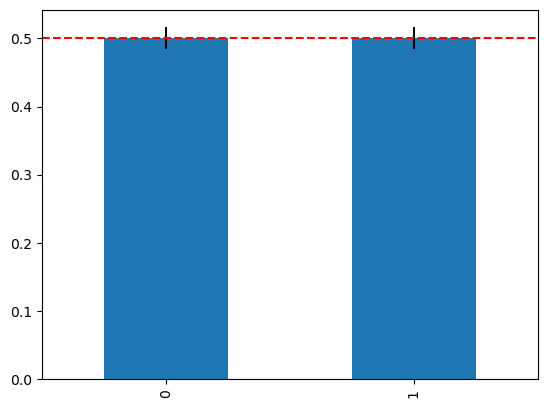

In [77]:
freqs =pd.Series(y).value_counts() /len(y) 
std_errors = np.sqrt(freqs*(1-freqs)/len(y)) 
expected_frequency = 1/len(np.unique(y)) 
freqs.plot(kind='bar',yerr=std_errors*1.96) 
plt.axhline(expected_frequency,color='red',linestyle='--')

In [78]:
balanced_data2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,0,0,-1.28,1,0,2,1,1,1,1,1,1,0,0,3,-1.48,-1.00,0
1,1,0,0,0,-1.28,1,0,2,1,1,1,1,1,1,0,0,3,-1.50,-1.00,0
2,1,0,0,0,-1.28,1,0,2,1,1,1,1,1,1,0,0,3,-1.48,-1.00,0
3,1,0,0,0,-1.28,1,0,2,1,1,1,1,1,1,0,0,3,-1.48,-1.00,0
4,1,0,0,0,-1.28,1,0,2,1,1,1,1,1,1,0,0,3,-1.48,-1.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3733,1,0,0,0,-0.83,1,0,0,0,0,0,2,2,0,1,1,2,-0.17,-0.69,1
3734,0,0,0,0,-0.95,1,0,0,0,0,0,0,0,0,0,1,0,-0.68,-0.83,1
3735,1,1,0,0,-1.28,1,2,1,0,0,0,0,0,0,0,1,2,0.36,-0.97,1
3736,0,0,0,0,1.41,1,2,1,2,2,2,0,2,0,0,1,1,1.27,2.03,1


## Model Selection
# **ALGORITHM 1: Gradient Boosting Machine**

### Manual Splitting:

In [82]:
fit_model_GBM(balanced_data2, 'Churn')

Train Accuracy: 0.9536128456735058
Validation Accuracy: 0.660427807486631
Test Accuracy: 0.6764705882352942


Train Precision: 0.9536555895502011
Validation Precision: 0.6612479385465412
Test Precision: 0.6790647229241137


Train Recall: 0.9536128456735058
Validation Recall: 0.660427807486631
Test Recall: 0.6764705882352942


Train F1 Score: 0.9536152453808064
Validation F1 Score: 0.6597708158850873
Test F1 Score: 0.6766788093956118


AUC-ROC: 0.7430810054864274
AUC-PR: 0.6955308477089137


### Cross-Validation:

In [83]:
fit_model_GBM_cv(balanced_data2, 'Churn', 10)

Fold 1:
  Accuracy: 0.6524064171122995
  Precision: 0.6587430081750568
  Recall: 0.6524064171122995
  F1 Score: 0.6524064171122995
  AUC: 0.753146551724138
Fold 2:
  Accuracy: 0.7085561497326203
  Precision: 0.7088100318798848
  Recall: 0.7085561497326203
  F1 Score: 0.7086375079334294
  AUC: 0.7759346798452944
Fold 3:
  Accuracy: 0.6042780748663101
  Precision: 0.6092754068278751
  Recall: 0.6042780748663101
  F1 Score: 0.6042780748663101
  AUC: 0.6779899497487438
Fold 4:
  Accuracy: 0.6764705882352942
  Precision: 0.6764663823487352
  Recall: 0.6764705882352942
  F1 Score: 0.6764636488697876
  AUC: 0.7401767330130407
Fold 5:
  Accuracy: 0.6443850267379679
  Precision: 0.6444298449564972
  Recall: 0.6443850267379679
  F1 Score: 0.6444028294857407
  AUC: 0.7348439332818355
Fold 6:
  Accuracy: 0.6951871657754011
  Precision: 0.6951718519335257
  Recall: 0.6951871657754011
  F1 Score: 0.6950999368278781
  AUC: 0.7692076659038901
Fold 7:
  Accuracy: 0.660427807486631
  Precision: 0.663937

### Feature Selection

## Feature Engineering

### Variance Thresholding

In [84]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data2, threshold=0.7)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [ 6 10 12 13 16 17 18]
Selected features: ['MultipleLines', 'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [85]:
selected_features.append('Churn')
var_thrsh_data=balanced_data2[selected_features]
fit_model_GBM(var_thrsh_data,'Churn')

Train Accuracy: 0.9032114183764496
Validation Accuracy: 0.6483957219251337
Test Accuracy: 0.6711229946524064


Train Precision: 0.9032476491053023
Validation Precision: 0.6488729384821434
Test Precision: 0.675681230355997


Train Recall: 0.9032114183764496
Validation Recall: 0.6483957219251337
Test Recall: 0.6711229946524064


Train F1 Score: 0.9031991468147001
Validation F1 Score: 0.6479078573999172
Test F1 Score: 0.6710712677954438


AUC-ROC: 0.7441531896582638
AUC-PR: 0.7057458851677852


### Wrapper Method 

#### Recursive Feature Elimination

In [86]:
rfe_selected_features = select_features_rfe(balanced_data2, 'Churn', 3)
print("Selected features:", rfe_selected_features)

Selected features: ['PhoneService', 'MonthlyCharges', 'TotalCharges']


In [87]:
rfe_selected_features.append('Churn')
wrapper_data_rfe=balanced_data2[rfe_selected_features]
fit_model_GBM(wrapper_data_rfe,'Churn')

Train Accuracy: 0.8581623550401427
Validation Accuracy: 0.6590909090909091
Test Accuracy: 0.68048128342246


Train Precision: 0.8586261707297951
Validation Precision: 0.660725677830941
Test Precision: 0.6878794214066916


Train Recall: 0.8581623550401427
Validation Recall: 0.6590909090909091
Test Recall: 0.68048128342246


Train F1 Score: 0.8580629024106553
Validation F1 Score: 0.657912122598689
Test F1 Score: 0.6799081992370799


AUC-ROC: 0.7490407716857318
AUC-PR: 0.7022960740923455


#### Forward Feature Selection

In [88]:
ffs_selected_features = select_features_wrapper_ols(balanced_data2, 'Churn', 4)
# Print the selected features
print("Selected features using OLS:", ffs_selected_features)

Selected features using OLS: ['Partner', 'PhoneService', 'MonthlyCharges', 'TotalCharges']


In [89]:
ffs_selected_features.append('Churn')
wrapper_data_ffs=balanced_data2[ffs_selected_features]
fit_model_GBM(wrapper_data_ffs,'Churn')

Train Accuracy: 0.8835860838537021
Validation Accuracy: 0.6524064171122995
Test Accuracy: 0.6711229946524064


Train Precision: 0.8837638729874947
Validation Precision: 0.6542164113054484
Test Precision: 0.6763388843307288


Train Recall: 0.8835860838537021
Validation Recall: 0.6524064171122995
Test Recall: 0.6711229946524064


Train F1 Score: 0.8835466580048401
Validation F1 Score: 0.6510335259259651
Test F1 Score: 0.6709536970740997


AUC-ROC: 0.7460644744863197
AUC-PR: 0.6990684301486263


### Principal Component Analysis

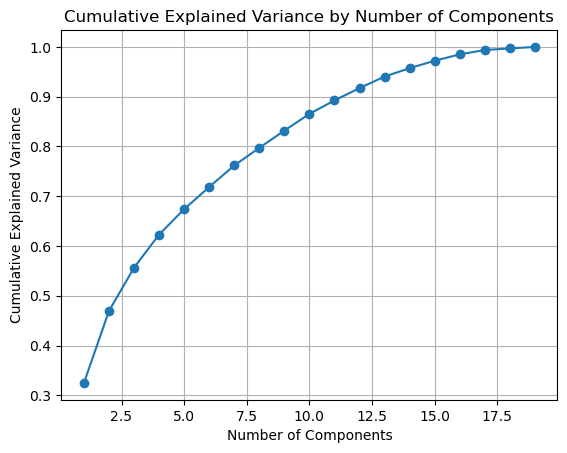

In [90]:
X_pca_df=perform_pca(balanced_data2,'Churn')

In [91]:
X_pca_df = X_pca_df.merge(balanced_data2[['Churn']], left_index=True, right_index=True)
fit_model_GBM(X_pca_df,'Churn')

Train Accuracy: 0.983942908117752
Validation Accuracy: 0.6470588235294118
Test Accuracy: 0.6631016042780749


Train Precision: 0.9840216103536183
Validation Precision: 0.6493548238967718
Test Precision: 0.6685786232028291


Train Recall: 0.983942908117752
Validation Recall: 0.6470588235294118
Test Recall: 0.6631016042780747


Train F1 Score: 0.9839438921021493
Validation F1 Score: 0.6452825975528681
Test F1 Score: 0.6628607216842511


AUC-ROC: 0.7251873632875534
AUC-PR: 0.661750666425864


**COMMENT :** The model didnt do good. The performance was poor and even with feature selection although training scores did get better but testing and validation not so much which shows overfitting. Low AUC scores shows that imbalance wasnot handled well.

## INTERPRETATION:


# ALGORITHM 2: Logistic Regression

### Manual Splitting:

In [92]:
fit_model_LR(balanced_data2, 'Churn')

Train Accuracy: 0.6922390722569135
Validation Accuracy: 0.6524064171122995
Test Accuracy: 0.68048128342246


Train Precision: 0.6975611883511491
Validation Precision: 0.6615315448190919
Test Precision: 0.6960778767086816


Train Recall: 0.6922390722569135
Validation Recall: 0.6524064171122995
Test Recall: 0.68048128342246


Train F1 Score: 0.6893710654263615
Validation F1 Score: 0.6467073741166357
Test F1 Score: 0.6779238856751506


AUC-ROC: 0.7586330548284146
AUC-PR: 0.7140535693288791


### Cross-Validation:

In [93]:
fit_model_LR_CV(balanced_data2, 'Churn', 10)

Fold 1:
  Accuracy: 0.6898395721925134
  Precision (Positive): 0.6260869565217392
  Precision (Negative): 0.7916666666666666
  Recall (Positive): 0.8275862068965517
  Recall (Negative): 0.57
  F1 Score (Positive): 0.7128712871287128
  F1 Score (Negative): 0.6627906976744186
  AUC: 0.7686637931034483
Fold 2:
  Accuracy: 0.679144385026738
  Precision (Positive): 0.6811594202898551
  Precision (Negative): 0.6766467065868264
  Recall (Positive): 0.7230769230769231
  Recall (Negative): 0.6312849162011173
  F1 Score (Positive): 0.7014925373134329
  F1 Score (Negative): 0.653179190751445
  AUC: 0.7360550064460679
Fold 3:
  Accuracy: 0.6336898395721925
  Precision (Positive): 0.5811965811965812
  Precision (Negative): 0.7214285714285714
  Recall (Positive): 0.7771428571428571
  Recall (Negative): 0.507537688442211
  F1 Score (Positive): 0.6650366748166259
  F1 Score (Negative): 0.5958702064896755
  AUC: 0.7085139985642499
Fold 4:
  Accuracy: 0.6925133689839572
  Precision (Positive): 0.6577777

## Feature Engineering

### Variance Thresholding

In [94]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data2, threshold=0.8)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [ 6 16 17 18]
Selected features: ['MultipleLines', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [95]:
selected_features.append('Churn')
var_thrsh_data=balanced_data2[selected_features]
fit_model_LR(var_thrsh_data,'Churn')

Train Accuracy: 0.6636931311329171
Validation Accuracy: 0.6510695187165776
Test Accuracy: 0.6684491978609626


Train Precision: 0.663786104919573
Validation Precision: 0.6511549109232317
Test Precision: 0.6695541171262601


Train Recall: 0.6636931311329171
Validation Recall: 0.6510695187165776
Test Recall: 0.6684491978609626


Train F1 Score: 0.663713740139461
Validation F1 Score: 0.6509153795627708
Test F1 Score: 0.6686960092836003


AUC-ROC: 0.7363108258328254
AUC-PR: 0.701146882078182


### Wrapper Method 

#### Recursive Feature Elimination

In [96]:
fit_model_LR(wrapper_data_rfe,'Churn')

Train Accuracy: 0.6833184656556646
Validation Accuracy: 0.6631016042780749
Test Accuracy: 0.68048128342246


Train Precision: 0.6841438164254949
Validation Precision: 0.6650722589567346
Test Precision: 0.6859605368723751


Train Recall: 0.6833184656556646
Validation Recall: 0.6631016042780749
Test Recall: 0.68048128342246


Train F1 Score: 0.6825741327677366
Validation F1 Score: 0.661770955897474
Test F1 Score: 0.6802853875599042


AUC-ROC: 0.7539247678129595
AUC-PR: 0.7147183415815858


#### Forward Feature Selection

In [97]:
fit_model_LR(wrapper_data_ffs,'Churn')

Train Accuracy: 0.6842105263157895
Validation Accuracy: 0.6631016042780749
Test Accuracy: 0.6764705882352942


Train Precision: 0.6847535396601209
Validation Precision: 0.6654856707670403
Test Precision: 0.6810676605461018


Train Recall: 0.6842105263157895
Validation Recall: 0.6631016042780749
Test Recall: 0.6764705882352942


Train F1 Score: 0.6836504461493291
Validation F1 Score: 0.6615326867992374
Test F1 Score: 0.6764197024654366


AUC-ROC: 0.7513500914404561
AUC-PR: 0.7154844424678473


### Principal Component Analysis

In [98]:
fit_model_LR(X_pca_df,'Churn')

Train Accuracy: 0.691793041926851
Validation Accuracy: 0.6510695187165776
Test Accuracy: 0.68048128342246


Train Precision: 0.6970394979310776
Validation Precision: 0.6598893345216875
Test Precision: 0.6960778767086816


Train Recall: 0.691793041926851
Validation Recall: 0.6510695187165776
Test Recall: 0.68048128342246


Train F1 Score: 0.688947863898179
Validation F1 Score: 0.6454704688101273
Test F1 Score: 0.6779238856751506


AUC-ROC: 0.7585756804245705
AUC-PR: 0.7141799660011511


**Comment :** The model performed poorly with or without feautre selection. Performance scores were around 60% which are not indicators of a good model. 

AUC scores however touched 70% which is much better than baseline models, hence imbalance is handled.

# ALGORITHM 3: DECISION TREES

### Manual Splitting:

In [99]:
fit_model_DT(balanced_data2, 'Churn')

Train Accuracy: 0.9875111507582516
Validation Accuracy: 0.6216577540106952
Test Accuracy: 0.6296791443850267


Train Precision: 0.9877389085705388
Validation Precision: 0.6216899253624638
Test Precision: 0.6316487419428597


Train Recall: 0.9875111507582516
Validation Recall: 0.6216577540106952
Test Recall: 0.6296791443850267


Train F1 Score: 0.9875118663348612
Validation F1 Score: 0.6216638399993347
Test F1 Score: 0.6299605859837614


AUC-ROC: 0.6304191917380859
AUC-PR: 0.7031465611524909


### Cross-Validation:

In [100]:
fit_model_DT_CV(balanced_data2, 'Churn', 10)

Fold 1:
  Accuracy: 0.6577540106951871
  Precision (Positive): 0.6210526315789474
  Precision (Negative): 0.6956521739130435
  Recall (Positive): 0.6781609195402298
  Recall (Negative): 0.64
  F1 Score (Positive): 0.6483516483516484
  F1 Score (Negative): 0.6666666666666666
  AUC: 0.651580459770115
Fold 2:
  Accuracy: 0.6737967914438503
  Precision (Positive): 0.6994535519125683
  Precision (Negative): 0.6492146596858639
  Recall (Positive): 0.6564102564102564
  Recall (Negative): 0.6927374301675978
  F1 Score (Positive): 0.6772486772486772
  F1 Score (Negative): 0.6702702702702703
  AUC: 0.678269588884114
Fold 3:
  Accuracy: 0.6016042780748663
  Precision (Positive): 0.5773809523809523
  Precision (Negative): 0.6213592233009708
  Recall (Positive): 0.5542857142857143
  Recall (Negative): 0.6432160804020101
  F1 Score (Positive): 0.565597667638484
  F1 Score (Negative): 0.6320987654320988
  AUC: 0.594300071787509
Fold 4:
  Accuracy: 0.6310160427807486
  Precision (Positive): 0.63186813

## Feature Selection

### Variance Thresholding

In [101]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data2, threshold=0.8)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [ 6 16 17 18]
Selected features: ['MultipleLines', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [102]:
selected_features.append('Churn')
var_thrsh_data=balanced_data2[selected_features]
fit_model_DT(var_thrsh_data,'Churn')

Train Accuracy: 0.9643175735950045
Validation Accuracy: 0.6283422459893048
Test Accuracy: 0.6590909090909091


Train Precision: 0.9653441995364659
Validation Precision: 0.6294127485459632
Test Precision: 0.6597920308857809


Train Recall: 0.9643175735950045
Validation Recall: 0.6283422459893048
Test Recall: 0.6590909090909091


Train F1 Score: 0.9643116671167767
Validation F1 Score: 0.6278634838179917
Test F1 Score: 0.6592990398883589


AUC-ROC: 0.6575465270556172
AUC-PR: 0.7176251245776191


### Wrapper Method 

#### Recursive Feature Elimination

In [103]:
fit_model_DT(wrapper_data_rfe,'Churn')

Train Accuracy: 0.9442462087421944
Validation Accuracy: 0.6002673796791443
Test Accuracy: 0.6350267379679144


Train Precision: 0.9457019832594843
Validation Precision: 0.600764693006927
Test Precision: 0.6359026085602193


Train Recall: 0.9442462087421944
Validation Recall: 0.6002673796791443
Test Recall: 0.6350267379679144


Train F1 Score: 0.9442273388033825
Validation F1 Score: 0.6000422402131514
Test F1 Score: 0.6352730312069264


AUC-ROC: 0.6239071969017822
AUC-PR: 0.6871200119471863


#### Forward Feature Selection

In [104]:
fit_model_LR(wrapper_data_ffs,'Churn')

Train Accuracy: 0.6842105263157895
Validation Accuracy: 0.6631016042780749
Test Accuracy: 0.6764705882352942


Train Precision: 0.6847535396601209
Validation Precision: 0.6654856707670403
Test Precision: 0.6810676605461018


Train Recall: 0.6842105263157895
Validation Recall: 0.6631016042780749
Test Recall: 0.6764705882352942


Train F1 Score: 0.6836504461493291
Validation F1 Score: 0.6615326867992374
Test F1 Score: 0.6764197024654366


AUC-ROC: 0.7513500914404561
AUC-PR: 0.7154844424678473


### Principal Component Analysis

In [105]:
fit_model_DT(X_pca_df,'Churn')

Train Accuracy: 0.9875111507582516
Validation Accuracy: 0.6002673796791443
Test Accuracy: 0.6203208556149733


Train Precision: 0.9877389085705388
Validation Precision: 0.6003625283037047
Test Precision: 0.6211292203461409


Train Recall: 0.9875111507582516
Validation Recall: 0.6002673796791443
Test Recall: 0.6203208556149733


Train F1 Score: 0.9875118663348612
Validation F1 Score: 0.6002623785829174
Test F1 Score: 0.6205655450407178


AUC-ROC: 0.6178864703983935
AUC-PR: 0.6914507305856323


**Comment :** Again a poor model. Training accuracy reached 98% with PCA and without feature selection but significantly decreased in val-test datasets. Wrapper's showed generalizility but scores were too low.

# ALGORITHM 4: Random Forest

In [106]:
fit_model_RF(balanced_data2, 'Churn')

Train Accuracy: 0.8487957181088314
Validation Accuracy: 0.7018716577540107
Test Accuracy: 0.7125668449197861


Train Precision: 0.8561920897031191
Validation Precision: 0.7123346795806689
Test Precision: 0.7311073577158136


Train Recall: 0.8487957181088314
Validation Recall: 0.7018716577540107
Test Recall: 0.7125668449197861


Train F1 Score: 0.8477899968741024
Validation F1 Score: 0.697688191666288
Test F1 Score: 0.7099671701682096


AUC-ROC: 0.7793380428156489
AUC-PR: 0.7308548741880425


### Cross-Validation:

In [107]:
fit_model_RF_CV(balanced_data2, 'Churn', KF=5, n_estimators=30)

Fold 1:
  Accuracy: 0.6657754010695187
  Precision: 0.6521739130434783
  Recall: 0.6910569105691057
  F1 Score (Positive): 0.6710526315789473
  F1 Score (Negative): 0.6603260869565217
  AUC-ROC: 0.7384716591229238
  AUC-PR: 0.6915142530118128
Fold 2:
  Accuracy: 0.6617647058823529
  Precision: 0.6363636363636364
  Recall: 0.6980609418282548
  F1 Score (Positive): 0.665785997357992
  F1 Score (Negative): 0.6576454668470907
  AUC-ROC: 0.7119471465280909
  AUC-PR: 0.6522972188982397
Fold 3:
  Accuracy: 0.6684491978609626
  Precision: 0.67828418230563
  Recall: 0.6640419947506562
  F1 Score (Positive): 0.6710875331564987
  F1 Score (Negative): 0.6657681940700808
  AUC-ROC: 0.7451279080578144
  AUC-PR: 0.7071937620347045
Fold 4:
  Accuracy: 0.677376171352075
  Precision: 0.6885245901639344
  Recall: 0.6649076517150396
  F1 Score (Positive): 0.676510067114094
  F1 Score (Negative): 0.678237650200267
  AUC-ROC: 0.7388615636113341
  AUC-PR: 0.7053190536008694
Fold 5:
  Accuracy: 0.677376171352

## Feature Engineering

### Variance Thresholding

In [108]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data2, threshold=1.0)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)

Indices of selected features: [17]
Selected features: ['MonthlyCharges']


In [109]:
selected_features.append('Churn')
var_thrsh_data=balanced_data2[selected_features]
fit_model_RF(var_thrsh_data,'Churn')

Train Accuracy: 0.7301516503122212
Validation Accuracy: 0.6243315508021391
Test Accuracy: 0.6483957219251337


Train Precision: 0.7415638271211774
Validation Precision: 0.6314059714795008
Test Precision: 0.6678301644879184


Train Recall: 0.7301516503122212
Validation Recall: 0.6243315508021391
Test Recall: 0.6483957219251337


Train F1 Score: 0.7261600803857363
Validation F1 Score: 0.6183034549258459
Test F1 Score: 0.6437692414826578


AUC-ROC: 0.6992433750493061
AUC-PR: 0.6349496614890646


### Wrapper Method 

#### Recursive Feature Elimination

In [110]:
fit_model_RF(wrapper_data_rfe,'Churn')

Train Accuracy: 0.7970561998215878
Validation Accuracy: 0.6711229946524064
Test Accuracy: 0.6844919786096256


Train Precision: 0.809155135949032
Validation Precision: 0.680533328944564
Test Precision: 0.7012369373022702


Train Recall: 0.7970561998215878
Validation Recall: 0.6711229946524064
Test Recall: 0.6844919786096256


Train F1 Score: 0.7946121848067562
Validation F1 Score: 0.6661826847229475
Test F1 Score: 0.681722217100006


AUC-ROC: 0.7740488399612723
AUC-PR: 0.7257298640085933


#### Forward Feature Selection

In [111]:
fit_model_RF(wrapper_data_ffs,'Churn')

Train Accuracy: 0.8068688670829617
Validation Accuracy: 0.6671122994652406
Test Accuracy: 0.68048128342246


Train Precision: 0.8187231977239304
Validation Precision: 0.6747582269276823
Test Precision: 0.6937153510278173


Train Recall: 0.8068688670829617
Validation Recall: 0.6671122994652406
Test Recall: 0.68048128342246


Train F1 Score: 0.8046575505248443
Validation F1 Score: 0.6628620532846787
Test F1 Score: 0.6785320590403291


AUC-ROC: 0.7566608096962744
AUC-PR: 0.7063378009691128


### Principal Component Analysis

In [112]:
fit_model_RF(X_pca_df,'Churn')

Train Accuracy: 0.9112399643175736
Validation Accuracy: 0.6631016042780749
Test Accuracy: 0.696524064171123


Train Precision: 0.9123091658267097
Validation Precision: 0.6703428733675831
Test Precision: 0.7128777736362876


Train Recall: 0.9112399643175736
Validation Recall: 0.6631016042780749
Test Recall: 0.696524064171123


Train F1 Score: 0.9111408121236394
Validation F1 Score: 0.6589034021825304
Test F1 Score: 0.6940950713316284


AUC-ROC: 0.7506329113924051
AUC-PR: 0.6742677924661791


**Comment :** Performance similar to that of Decicision Trees.

# ALGORITHM 5: MultiLayer Perecptron 

### MODEL SELECTION

### Manual Splitting:

In [113]:
fit_model_MLP(balanced_data2, 'Churn')

Train Accuracy: 0.6855486173059768
Validation Accuracy: 0.6644385026737968
Test Accuracy: 0.660427807486631


Train Precision: 0.7004873377070053
Validation Precision: 0.6915863354911344
Test Precision: 0.6880015984444273


Train Recall: 0.6855486173059768
Validation Recall: 0.6644385026737968
Test Recall: 0.660427807486631


Train F1 Score: 0.6782820601306978
Validation F1 Score: 0.6511316556553931
Test F1 Score: 0.6536573736309593


AUC-ROC: 0.7565890916914692
AUC-PR: 0.7144621935470571


### Cross-Validation:

In [114]:
fit_model_MLP_CV(balanced_data2, 'Churn', KF=5)

Fold 1:
  Accuracy: 0.6818181818181818
  Precision: 0.6445916114790287
  Recall: 0.7913279132791328
  F1 Score (Positive): 0.7104622871046229
  F1 Score (Negative): 0.6468842729970327
  AUC-ROC: 0.7505487983639731
  AUC-PR: 0.7179193603003762
Fold 2:
  Accuracy: 0.6644385026737968
  Precision: 0.6206140350877193
  Recall: 0.7839335180055401
  F1 Score (Positive): 0.6927784577723378
  F1 Score (Negative): 0.6303387334315169
  AUC-ROC: 0.7335888681311602
  AUC-PR: 0.676996717491638
Fold 3:
  Accuracy: 0.7072192513368984
  Precision: 0.6738197424892703
  Recall: 0.8241469816272966
  F1 Score (Positive): 0.7414403778040142
  F1 Score (Negative): 0.662557781201849
  AUC-ROC: 0.7641728707617269
  AUC-PR: 0.7480453820750341
Fold 4:
  Accuracy: 0.6706827309236948
  Precision: 0.6658354114713217
  Recall: 0.7044854881266491
  F1 Score (Positive): 0.6846153846153846
  F1 Score (Negative): 0.6554621848739496
  AUC-ROC: 0.7350400080302857
  AUC-PR: 0.720909271439408
Fold 5:
  Accuracy: 0.696117804

## Feature Selection

### Variance Thresholding

In [115]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data2, threshold=0.5)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [ 4  6  8  9 10 11 12 13 16 17 18]
Selected features: ['tenure', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [116]:
selected_features.append('Churn')
var_thrsh_data=balanced_data2[selected_features]
fit_model_MLP(var_thrsh_data,'Churn')

Train Accuracy: 0.6650312221231044
Validation Accuracy: 0.6336898395721925
Test Accuracy: 0.6631016042780749


Train Precision: 0.6651284717561772
Validation Precision: 0.6346561981046587
Test Precision: 0.6672960720585694


Train Recall: 0.6650312221231044
Validation Recall: 0.6336898395721925
Test Recall: 0.6631016042780749


Train F1 Score: 0.6647350958134668
Validation F1 Score: 0.6326967944928242
Test F1 Score: 0.6631016042780749


AUC-ROC: 0.7298490335998853
AUC-PR: 0.6911527427579229


### Wrapper Method 

#### Recursive Feature Elimination

In [117]:
fit_model_MLP(wrapper_data_rfe,'Churn')

Train Accuracy: 0.6837644959857271
Validation Accuracy: 0.6564171122994652
Test Accuracy: 0.6764705882352942


Train Precision: 0.6843234836742553
Validation Precision: 0.6581947912202576
Test Precision: 0.68074962189846


Train Recall: 0.6837644959857271
Validation Recall: 0.6564171122994652
Test Recall: 0.6764705882352942


Train F1 Score: 0.6831914249139384
Validation F1 Score: 0.6551176593358571
Test F1 Score: 0.6764705882352942


AUC-ROC: 0.7542761860365045
AUC-PR: 0.7157239713492517


#### Forward Feature Selection

In [118]:
fit_model_MLP(wrapper_data_ffs,'Churn')

Train Accuracy: 0.6859946476360392
Validation Accuracy: 0.6631016042780749
Test Accuracy: 0.68048128342246


Train Precision: 0.6869859620054425
Validation Precision: 0.6661831821358037
Test Precision: 0.6859605368723751


Train Recall: 0.6859946476360392
Validation Recall: 0.6631016042780749
Test Recall: 0.68048128342246


Train F1 Score: 0.6851713613482636
Validation F1 Score: 0.6611380443789933
Test F1 Score: 0.6802853875599042


AUC-ROC: 0.75126402983469
AUC-PR: 0.7151598936621856


### Principal Component Analysis

In [119]:
fit_model_MLP(X_pca_df,'Churn')

Train Accuracy: 0.6873327386262266
Validation Accuracy: 0.6590909090909091
Test Accuracy: 0.6617647058823529


Train Precision: 0.7007633420910347
Validation Precision: 0.6819438258378274
Test Precision: 0.6874150395452299


Train Recall: 0.6873327386262266
Validation Recall: 0.6590909090909091
Test Recall: 0.6617647058823529


Train F1 Score: 0.6807939402879659
Validation F1 Score: 0.647065468097003
Test F1 Score: 0.6556703376829289


AUC-ROC: 0.755871911643418
AUC-PR: 0.7136844150755018


**Comment :** Poor performance but better AUC scores hence imbalance handled well.

# CI ALGORITHM 3: Class Weighting

First i will apply tomek links to downsize my data and see if imbalance is being handled in any way then apply class weighting technique in each algorithms to see how well it handles class imbalance and the effect of change of algorithm on the CI technique.

#### Applying Tomek Links

In [24]:
from imblearn.under_sampling import TomekLinks

# Instantiate TomekLinks
tl = TomekLinks()

X = df_data.drop(columns=['Churn'])
y = df_data['Churn']

# Apply TomekLinks
data_resampled, target_resampled = tl.fit_resample(X,y)


In [25]:
balanced_data3 = pd.concat([pd.DataFrame(data_resampled, columns=X.columns), pd.Series(target_resampled, name='Churn')], axis=1)

### Checking if the dataset has become balanced

In [122]:
import numpy as np 
from scipy.stats import norm,chisquare 
import matplotlib.pyplot as plt
X = balanced_data3.drop(columns=['Churn'])
y = balanced_data3['Churn']

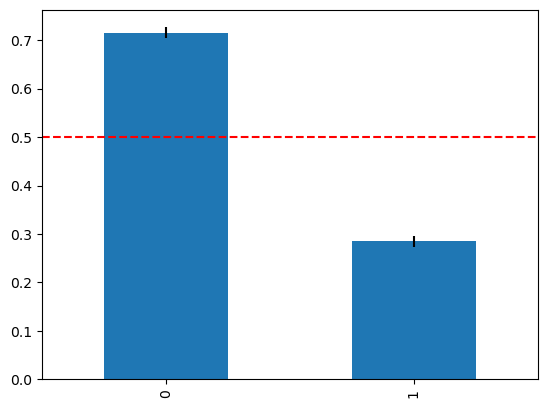

In [123]:
freqs =pd.Series(y).value_counts() /len(y) 
std_errors = np.sqrt(freqs*(1-freqs)/len(y)) 
expected_frequency = 1/len(np.unique(y)) 
freqs.plot(kind='bar',yerr=std_errors*1.96) 
plt.axhline(expected_frequency,color='red',linestyle='--')

The dataset hasnot balanced so we will use class weighting in each of the algorithm so that it handles the imbalance of the dataset.

## Model Selection
# **ALGORITHM 1: Gradient Boosting Machine**

### Manual Splitting:

In [124]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, precision_recall_curve

def fit_model_GBM(data, target, class_weights=None):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is spit into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    X_train = np.ascontiguousarray(X_train)
    X_val = np.ascontiguousarray(X_val)
    X_test = np.ascontiguousarray(X_test)

    # Initialize the XGBoost classifier
    if class_weights:
        ratio = np.sum(y_train == 0) / np.sum(y_train == 1)
        xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=6, scale_pos_weight=ratio, random_state=42)
    else:
        xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=6, random_state=42)

    # Fit the model to the training data
    xgb_classifier.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = xgb_classifier.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    
    # Make predictions on the validation set
    y_val_pred = xgb_classifier.predict(X_val)

    # Evaluate the model's performance on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred, average='weighted', zero_division=1)
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    
    # Make predictions on the test set
    y_test_pred = xgb_classifier.predict(X_test)

    # Evaluate the model's performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted', zero_division=1)
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted') 

    # Calculate AUC-ROC
    y_test_proba = xgb_classifier.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)
    
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {roc_auc}")
    print(f"AUC-PR: {auc_pr}")
    
# Example usage with class weighting
fit_model_GBM(balanced_data3, 'Churn', class_weights=True)


Train Accuracy: 0.9507489210459508
Validation Accuracy: 0.7738004569687738
Test Accuracy: 0.7837014470677837


Train Precision: 0.956708933015601
Validation Precision: 0.7872610427390176
Test Precision: 0.8023142366370991


Train Recall: 0.9507489210459508
Validation Recall: 0.7738004569687738
Test Recall: 0.7837014470677837


Train F1 Score: 0.9517145050515862
Validation F1 Score: 0.778712662793392
Test F1 Score: 0.7897499545320823


AUC-ROC: 0.8522515527950312
AUC-PR: 0.7045567863216884


### Cross Validation

In [125]:
import numpy as np
from sklearn.model_selection import KFold
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def fit_model_GBM_cv(data, target, KF, class_weights=None):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # Number of folds for cross-validation
    num_folds = KF

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_accuracy = 0
    overall_precision_pos = 0
    overall_precision_neg = 0
    overall_recall_pos = 0
    overall_recall_neg = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        # Initialize the XGBoost classifier
        if class_weights:
            ratio = np.sum(y_train == 0) / np.sum(y_train == 1)
            xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=6, scale_pos_weight=ratio, random_state=42)
        else:
            xgb_classifier = xgb.XGBClassifier(n_estimators=100, max_depth=6, random_state=42)

        # Fit the model to the training data
        xgb_classifier.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = xgb_classifier.predict(X_test)

        # Calculate metrics for this fold
        fold_accuracy = accuracy_score(y_test, predictions)
        fold_precision_pos = precision_score(y_test, predictions, pos_label=1)
        fold_precision_neg = precision_score(y_test, predictions, pos_label=0)
        fold_recall_pos = recall_score(y_test, predictions, pos_label=1)
        fold_recall_neg = recall_score(y_test, predictions, pos_label=0)
        fold_f1_pos = f1_score(y_test, predictions, pos_label=1)
        fold_f1_neg = f1_score(y_test, predictions, pos_label=0)
        fold_auc = roc_auc_score(y_test, xgb_classifier.predict_proba(X_test)[:, 1])

        print(f"Fold {fold}:")
        print(f"  Accuracy: {fold_accuracy}")
        print(f"  Precision (Positive): {fold_precision_pos}")
        print(f"  Precision (Negative): {fold_precision_neg}")
        print(f"  Recall (Positive): {fold_recall_pos}")
        print(f"  Recall (Negative): {fold_recall_neg}")
        print(f"  F1 Score (Positive): {fold_f1_pos}")
        print(f"  F1 Score (Negative): {fold_f1_neg}")
        print(f"  AUC: {fold_auc}")

        # Add fold metrics to overall metrics
        overall_accuracy += fold_accuracy
        overall_precision_pos += fold_precision_pos
        overall_precision_neg += fold_precision_neg
        overall_recall_pos += fold_recall_pos
        overall_recall_neg += fold_recall_neg
        overall_f1_pos += fold_f1_pos
        overall_f1_neg += fold_f1_neg
        overall_auc += fold_auc

    # Calculate and print average metrics across all folds
    average_accuracy = overall_accuracy / num_folds
    average_precision_pos = overall_precision_pos / num_folds
    average_precision_neg = overall_precision_neg / num_folds
    average_recall_pos = overall_recall_pos / num_folds
    average_recall_neg = overall_recall_neg / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc = overall_auc / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision (Positive): {average_precision_pos}")
    print(f"  Average Precision (Negative): {average_precision_neg}")
    print(f"  Average Recall (Positive): {average_recall_pos}")
    print(f"  Average Recall (Negative): {average_recall_neg}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC: {average_auc}")

# Example usage with class weighting
fit_model_GBM_cv(balanced_data3, 'Churn', 10, class_weights='balanced')


Fold 1:
  Accuracy: 0.7853881278538812
  Precision (Positive): 0.5991379310344828
  Precision (Negative): 0.8870588235294118
  Recall (Positive): 0.7433155080213903
  Recall (Negative): 0.8021276595744681
  F1 Score (Positive): 0.6634844868735084
  F1 Score (Negative): 0.8424581005586592
  AUC: 0.8434918648310389
Fold 2:
  Accuracy: 0.7945205479452054
  Precision (Positive): 0.6044444444444445
  Precision (Negative): 0.8935185185185185
  Recall (Positive): 0.7472527472527473
  Recall (Negative): 0.8126315789473684
  F1 Score (Positive): 0.6683046683046683
  F1 Score (Negative): 0.8511576626240352
  AUC: 0.85
Fold 3:
  Accuracy: 0.7853881278538812
  Precision (Positive): 0.5882352941176471
  Precision (Negative): 0.8741721854304636
  Recall (Positive): 0.6779661016949152
  Recall (Negative): 0.825
  F1 Score (Positive): 0.6299212598425197
  F1 Score (Negative): 0.8488745980707395
  AUC: 0.8386064030131828
Fold 4:
  Accuracy: 0.806697108066971
  Precision (Positive): 0.6425531914893617
 

### Feature Selection

### Variance Thresholding

In [126]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data3, threshold=0.8)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)

Indices of selected features: [ 4  6 16 17 18]
Selected features: ['tenure', 'MultipleLines', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [127]:
selected_features.append('Churn')
var_thrsh_data=balanced_data3[selected_features]
fit_model_GBM(var_thrsh_data,'Churn',class_weights=True)

Train Accuracy: 0.9065752729119065
Validation Accuracy: 0.7463823305407464
Test Accuracy: 0.766945925361767


Train Precision: 0.9233448132243681
Validation Precision: 0.7688039776401443
Test Precision: 0.7918351854842968


Train Recall: 0.9065752729119065
Validation Recall: 0.7463823305407464
Test Recall: 0.766945925361767


Train F1 Score: 0.909419502164127
Validation F1 Score: 0.7538801263709808
Test F1 Score: 0.7745876333815531


AUC-ROC: 0.836082355647573
AUC-PR: 0.6766157328745741


### Wrapper Method 

#### Recursive Feature Elimination

In [128]:
rfe_selected_features = select_features_rfe(balanced_data3, 'Churn', 3)
# Print the selected features
print("Selected features:", rfe_selected_features)

Selected features: ['tenure', 'Contract', 'MonthlyCharges']


In [129]:
rfe_selected_features.append('Churn')
wrapper_data_rfe=balanced_data3[rfe_selected_features]
fit_model_GBM(wrapper_data_rfe,'Churn', class_weights='balanced')

Train Accuracy: 0.8768723026148769
Validation Accuracy: 0.7517136329017517
Test Accuracy: 0.7654226961157654


Train Precision: 0.903344080476106
Validation Precision: 0.7859623537418082
Test Precision: 0.8052398701893664


Train Recall: 0.8768723026148769
Validation Recall: 0.7517136329017517
Test Recall: 0.7654226961157654


Train F1 Score: 0.8813414966602124
Validation F1 Score: 0.7611436175364249
Test F1 Score: 0.7752414363518513


AUC-ROC: 0.8465651598803774
AUC-PR: 0.676986447761973


#### Forward Feature Selection

In [130]:
ffs_selected_features = select_features_wrapper_ols(balanced_data3, 'Churn', 4)
# Print the selected features
print("Selected features using OLS:", ffs_selected_features)

Selected features using OLS: ['tenure', 'OnlineSecurity', 'TechSupport', 'MonthlyCharges']


In [131]:
ffs_selected_features.append('Churn')
wrapper_data_ffs=balanced_data3[ffs_selected_features]
fit_model_GBM(wrapper_data_ffs,'Churn', class_weights='balanced')

Train Accuracy: 0.8855039350088855
Validation Accuracy: 0.7471439451637472
Test Accuracy: 0.7661843107387661


Train Precision: 0.9074579386534404
Validation Precision: 0.7761313382284005
Test Precision: 0.8010766289881083


Train Recall: 0.8855039350088855
Validation Recall: 0.7471439451637472
Test Recall: 0.7661843107387661


Train F1 Score: 0.8893623627063002
Validation F1 Score: 0.7558925821896995
Test F1 Score: 0.7753941220644447


AUC-ROC: 0.8396509086726478
AUC-PR: 0.6746128618823943


### Principal Component Analysis

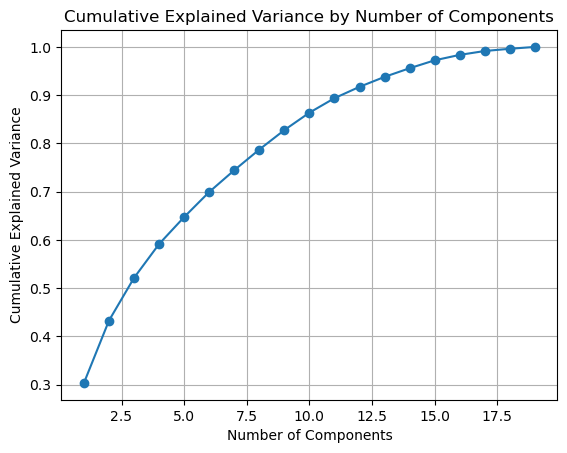

In [132]:
X_pca_df=perform_pca(balanced_data3,'Churn')

In [133]:
X_pca_df = X_pca_df.merge(balanced_data3[['Churn']], left_index=True, right_index=True)
fit_model_GBM(X_pca_df,'Churn', class_weights='balanced')

Train Accuracy: 0.9847677075399848
Validation Accuracy: 0.7882711348057883
Test Accuracy: 0.7920792079207921


Train Precision: 0.9854133228832148
Validation Precision: 0.7907858410353954
Test Precision: 0.7971329150785519


Train Recall: 0.9847677075399848
Validation Recall: 0.7882711348057883
Test Recall: 0.7920792079207921


Train F1 Score: 0.98487170328023
Validation F1 Score: 0.7894329980451248
Test F1 Score: 0.7942513437622182


AUC-ROC: 0.8531429721647112
AUC-PR: 0.6879717502462508


**COMMENT :** Cross validation was better here as across different folds, the perofrmance was same and scores were good as well. Manual splitting and feature selection evidently overfit on the training data. Wrapper's was better.

AUC-PR is around 70% meaning imbalance is not handled that well.

## INTERPRETATION:


# ALGORITHM 2: Logistic Regression

### Manual Splitting:

In [134]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, average_precision_score, precision_recall_curve

def fit_model_LR(data, target, class_weights=None):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Instantiate the Logistic Regression classifier
    if class_weights:
        log_reg_model = LogisticRegression(max_iter=1000, class_weight='balanced')
    else:
        log_reg_model = LogisticRegression(max_iter=1000)

    # Fit the model to the training data
    log_reg_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = log_reg_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    
    # Make predictions on the validation set
    y_val_pred = log_reg_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    
    # Make predictions on the test set
    y_test_pred = log_reg_model.predict(X_test)

    # Evaluate the model's performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted') 

    # Calculate AUC-ROC
    y_test_proba = log_reg_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)
    
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {roc_auc}")
    print(f"AUC-PR: {auc_pr}")

# Example usage with class weighting
fit_model_LR(balanced_data3, 'Churn', class_weights='balanced')


Train Accuracy: 0.773038842345773
Validation Accuracy: 0.7585681645087585
Test Accuracy: 0.773038842345773


Train Precision: 0.8142430554284298
Validation Precision: 0.8040441318520761
Test Precision: 0.8229880574507697


Train Recall: 0.773038842345773
Validation Recall: 0.7585681645087585
Test Recall: 0.773038842345773


Train F1 Score: 0.7823357650452147
Validation F1 Score: 0.7690036604036311
Test F1 Score: 0.7834449777841321


AUC-ROC: 0.8717161260639521
AUC-PR: 0.7346547375768643


## Feature Engineering

### Variance Thresholding

In [135]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data3, threshold=0.8)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [ 4  6 16 17 18]
Selected features: ['tenure', 'MultipleLines', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [136]:
selected_features.append('Churn')
var_thrsh_data=balanced_data3[selected_features]
fit_model_LR(var_thrsh_data,'Churn', class_weights='balanced')

Train Accuracy: 0.7471439451637472
Validation Accuracy: 0.734958111195735
Test Accuracy: 0.741051028179741


Train Precision: 0.7843023122229533
Validation Precision: 0.7784719079113901
Test Precision: 0.7896222525099946


Train Recall: 0.7471439451637472
Validation Recall: 0.734958111195735
Test Recall: 0.741051028179741


Train F1 Score: 0.7569200825322159
Validation F1 Score: 0.746099933579765
Test F1 Score: 0.7526791563349066


AUC-ROC: 0.8385524499654935
AUC-PR: 0.6738006457378809


### Wrapper Method 

#### Recursive Feature Elimination

In [137]:
fit_model_LR(wrapper_data_rfe,'Churn', class_weights='balanced')

Train Accuracy: 0.7555217060167555
Validation Accuracy: 0.738004569687738
Test Accuracy: 0.7524752475247525


Train Precision: 0.8019978339574001
Validation Precision: 0.7911849934610378
Test Precision: 0.812023157883922


Train Recall: 0.7555217060167555
Validation Recall: 0.738004569687738
Test Recall: 0.7524752475247525


Train F1 Score: 0.7659300728214051
Validation F1 Score: 0.7498908843519699
Test F1 Score: 0.7643801517864366


AUC-ROC: 0.8585188060731538
AUC-PR: 0.6833664498891192


#### fORWARD fEATURE sELECTION

In [138]:
fit_model_LR(wrapper_data_ffs,'Churn', class_weights='balanced')

Train Accuracy: 0.7585681645087585
Validation Accuracy: 0.7532368621477532
Test Accuracy: 0.7578065498857578


Train Precision: 0.7929653792692849
Validation Precision: 0.7893051027228912
Test Precision: 0.7993465672375641


Train Recall: 0.7585681645087585
Validation Recall: 0.7532368621477532
Test Recall: 0.7578065498857578


Train F1 Score: 0.7676325245527642
Validation F1 Score: 0.7628610744871651
Test F1 Score: 0.7680903858476741


AUC-ROC: 0.8543981481481482
AUC-PR: 0.6918701522429416


### Principal Component Analysis

In [139]:
fit_model_LR(X_pca_df,'Churn', class_weights='balanced')

Train Accuracy: 0.7732927138867733
Validation Accuracy: 0.7578065498857578
Test Accuracy: 0.773038842345773


Train Precision: 0.8143723846029152
Validation Precision: 0.8036670930689381
Test Precision: 0.8229880574507697


Train Recall: 0.7732927138867733
Validation Recall: 0.7578065498857578
Test Recall: 0.773038842345773


Train F1 Score: 0.7825691905824982
Validation F1 Score: 0.7683052191589339
Test F1 Score: 0.7834449777841321


AUC-ROC: 0.8717247527030135
AUC-PR: 0.7344950013938278


**Comment :** A well generalized and good model. AUC is much metter with PCA so PCA winds here. Performance is also good.

# ALGORITHM 3: DECISION TREES

### Manual Splitting:

In [160]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def fit_model_DT(data, target, class_weights=None):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Instantiate the Decision Tree classifier
    if class_weights:
        dt_model = DecisionTreeClassifier(class_weight='balanced', random_state=42)
    else:
        dt_model = DecisionTreeClassifier(random_state=42)

    # Fit the model to the training data
    dt_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = dt_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    
    # Make predictions on the validation set
    y_val_pred = dt_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    
    # Make predictions on the test set
    y_test_pred = dt_model.predict(X_test)

    # Evaluate the model's performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted') 

    # Calculate AUC-ROC
    roc_auc = roc_auc_score(y_test, dt_model.predict_proba(X_test)[:, 1])
    
    # Calculate AUC-PR
    y_test_prob = dt_model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
    pr_auc = auc(recall, precision)
    
    

    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {roc_auc}")
    print('\n')
    print(f"AUC-PR: {pr_auc}")

# Example usage with class weighting
fit_model_DT(balanced_data3, 'Churn', class_weights='balanced')


Train Accuracy: 0.9903528814419904
Validation Accuracy: 0.7395277989337395
Test Accuracy: 0.7517136329017517


Train Precision: 0.9906138499318776
Validation Precision: 0.7480680120644627
Test Precision: 0.7559858474220014


Train Recall: 0.9903528814419904
Validation Recall: 0.7395277989337395
Test Recall: 0.7517136329017517


Train F1 Score: 0.9903950758198112
Validation F1 Score: 0.7431725832020063
Test F1 Score: 0.7536701095233419


AUC-ROC: 0.7003364389233955


AUC-PR: 0.6194914646551856


### Cross Validation

In [161]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def fit_model_cv_DT(data, target, KF, class_weights=None):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    features = data.drop(columns=[target])
    X = features.values
    y = data[target_column_name].values

    # Number of folds for cross-validation
    num_folds = KF

    # Create Decision Tree classifier
    if class_weights:
        dt = DecisionTreeClassifier(class_weight='balanced')
    else:
        dt = DecisionTreeClassifier()

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_accuracy = 0
    overall_precision_pos = 0
    overall_precision_neg = 0
    overall_recall_pos = 0
    overall_recall_neg = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Decision Tree model
        dt.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = dt.predict(X_test)

        # Calculate metrics for this fold
        fold_accuracy = accuracy_score(y_test, predictions)
        fold_precision_pos = precision_score(y_test, predictions, pos_label=1)
        fold_precision_neg = precision_score(y_test, predictions, pos_label=0)
        fold_recall_pos = recall_score(y_test, predictions, pos_label=1)
        fold_recall_neg = recall_score(y_test, predictions, pos_label=0)
        fold_f1_pos = f1_score(y_test, predictions, pos_label=1)
        fold_f1_neg = f1_score(y_test, predictions, pos_label=0)
        fold_auc = roc_auc_score(y_test, dt.predict_proba(X_test)[:, 1])

        print(f"Fold {fold}:")
        print(f"  Accuracy: {fold_accuracy}")
        print(f"  Precision (Positive): {fold_precision_pos}")
        print(f"  Precision (Negative): {fold_precision_neg}")
        print(f"  Recall (Positive): {fold_recall_pos}")
        print(f"  Recall (Negative): {fold_recall_neg}")
        print(f"  F1 Score (Positive): {fold_f1_pos}")
        print(f"  F1 Score (Negative): {fold_f1_neg}")
        print(f"  AUC: {fold_auc}")

        # Add fold metrics to overall metrics
        overall_accuracy += fold_accuracy
        overall_precision_pos += fold_precision_pos
        overall_precision_neg += fold_precision_neg
        overall_recall_pos += fold_recall_pos
        overall_recall_neg += fold_recall_neg
        overall_f1_pos += fold_f1_pos
        overall_f1_neg += fold_f1_neg
        overall_auc += fold_auc

    # Calculate and print average metrics across all folds
    average_accuracy = overall_accuracy / num_folds
    average_precision_pos = overall_precision_pos / num_folds
    average_precision_neg = overall_precision_neg / num_folds
    average_recall_pos = overall_recall_pos / num_folds
    average_recall_neg = overall_recall_neg / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc = overall_auc / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision (Positive): {average_precision_pos}")
    print(f"  Average Precision (Negative): {average_precision_neg}")
    print(f"  Average Recall (Positive): {average_recall_pos}")
    print(f"  Average Recall (Negative): {average_recall_neg}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC: {average_auc}")

# Example usage with class weighting and 5-fold cross-validation
fit_model_cv_DT(balanced_data3, 'Churn', 5, class_weights='balanced')



Fold 1:
  Accuracy: 0.7425742574257426
  Precision (Positive): 0.5411140583554377
  Precision (Negative): 0.8237179487179487
  Recall (Positive): 0.5528455284552846
  Recall (Negative): 0.8167372881355932
  F1 Score (Positive): 0.546916890080429
  F1 Score (Negative): 0.8202127659574469
  AUC: 0.6847469110284323
Fold 2:
  Accuracy: 0.7585681645087585
  Precision (Positive): 0.5733695652173914
  Precision (Negative): 0.8306878306878307
  Recall (Positive): 0.568733153638814
  Recall (Negative): 0.8333333333333334
  F1 Score (Positive): 0.571041948579161
  F1 Score (Negative): 0.8320084790673026
  AUC: 0.7029217527655216
Fold 3:
  Accuracy: 0.7387661843107388
  Precision (Positive): 0.5644329896907216
  Precision (Negative): 0.8118918918918919
  Recall (Positive): 0.5572519083969466
  Recall (Negative): 0.816304347826087
  F1 Score (Positive): 0.5608194622279129
  F1 Score (Negative): 0.8140921409214092
  AUC: 0.6902934506029428
Fold 4:
  Accuracy: 0.7448591012947449
  Precision (Positiv

## Feature Selection

### Variance Thresholding

In [162]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data3, threshold=0.8)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [ 4  6 16 17 18]
Selected features: ['tenure', 'MultipleLines', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [163]:
selected_features.append('Churn')
var_thrsh_data=balanced_data3[selected_features]
fit_model_DT(var_thrsh_data,'Churn', class_weights='balanced')

Train Accuracy: 0.9781670474739782
Validation Accuracy: 0.715917745620716
Test Accuracy: 0.7418126428027418


Train Precision: 0.9791716082148788
Validation Precision: 0.7147693304862504
Test Precision: 0.7437679418829456


Train Recall: 0.9781670474739782
Validation Recall: 0.715917745620716
Test Recall: 0.7418126428027418


Train F1 Score: 0.9783473438234599
Validation F1 Score: 0.7153330771641023
Test F1 Score: 0.7427544906489127


AUC-ROC: 0.684635955831608


AUC-PR: 0.5909296625360666


### Wrapper Method 

#### Recursive Feature Elimination

In [164]:
fit_model_DT(wrapper_data_rfe,'Churn', class_weights='balanced')

Train Accuracy: 0.9487179487179487
Validation Accuracy: 0.7281035795887281
Test Accuracy: 0.7448591012947449


Train Precision: 0.9554241791277377
Validation Precision: 0.7362036481766334
Test Precision: 0.7551044776669881


Train Recall: 0.9487179487179487
Validation Recall: 0.7281035795887281
Test Recall: 0.7448591012947449


Train F1 Score: 0.9497820424972743
Validation F1 Score: 0.7316354799103729
Test F1 Score: 0.7490980369342063


AUC-ROC: 0.70317604094778


AUC-PR: 0.5964638763993407


#### fORWARD fEATURE sELECTION

In [165]:
fit_model_LR(wrapper_data_ffs,'Churn', class_weights='balanced')

Train Accuracy: 0.7585681645087585
Validation Accuracy: 0.7532368621477532
Test Accuracy: 0.7578065498857578


Train Precision: 0.7929653792692849
Validation Precision: 0.7893051027228912
Test Precision: 0.7993465672375641


Train Recall: 0.7585681645087585
Validation Recall: 0.7532368621477532
Test Recall: 0.7578065498857578


Train F1 Score: 0.7676325245527642
Validation F1 Score: 0.7628610744871651
Test F1 Score: 0.7680903858476741


AUC-ROC: 0.8543981481481482
AUC-PR: 0.6918701522429416


### Principal Component Analysis

In [166]:
fit_model_DT(X_pca_df,'Churn', class_weights='balanced')

Train Accuracy: 0.9903528814419904
Validation Accuracy: 0.7357197258187357
Test Accuracy: 0.7471439451637472


Train Precision: 0.9906138499318776
Validation Precision: 0.7460528360849564
Test Precision: 0.755640903104412


Train Recall: 0.9903528814419904
Validation Recall: 0.7357197258187357
Test Recall: 0.7471439451637472


Train F1 Score: 0.9903950758198112
Validation F1 Score: 0.7400192697417395
Test F1 Score: 0.7507569103464089


AUC-ROC: 0.7022342995169082


AUC-PR: 0.6211798632506726




**Comment :** Not a good model. Overfitting in training data. Ver low AUC hence imbalance not handled well.

# ALGORITHM 4: Random Forest

In [167]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def fit_model_RF(data, target, class_weights=None):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    # Instantiate the Random Forest classifier
    if class_weights:
        rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
    else:
        rf_model = RandomForestClassifier(random_state=42)

    # Fit the model to the training data
    rf_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = rf_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted')
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    
    # Make predictions on the validation set
    y_val_pred = rf_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    
    # Make predictions on the test set
    y_test_pred = rf_model.predict(X_test)

    # Evaluate the model's performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted') 

    # Calculate AUC-ROC
    roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
    
    # Calculate AUC-PR
    y_test_prob = rf_model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_test_prob)
    pr_auc = auc(recall, precision)

    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {roc_auc}")
    print(f"AUC-PR: {pr_auc}")

# Example usage with class weighting
fit_model_RF(balanced_data3, 'Churn', class_weights='balanced')


Train Accuracy: 0.9911144960649911
Validation Accuracy: 0.8042650418888042
Test Accuracy: 0.8225437928408226


Train Precision: 0.9912489153204809
Validation Precision: 0.7973127919059385
Test Precision: 0.8178916707229839


Train Recall: 0.9911144960649911
Validation Recall: 0.8042650418888042
Test Recall: 0.8225437928408226


Train F1 Score: 0.9911410368542501
Validation F1 Score: 0.7990220034708232
Test F1 Score: 0.8193729734282975


AUC-ROC: 0.8689426616057051
AUC-PR: 0.7250631624384911


### Cross-Validation:

In [168]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

def fit_model_cv_RF(data, target, KF, class_weights=None):

    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    features = data.drop(columns=[target])
    X = features.values
    y = data[target_column_name].values

    # Number of folds for cross-validation
    num_folds = KF

    # Create Random Forest classifier
    if class_weights:
        rf = RandomForestClassifier(class_weight='balanced')
    else:
        rf = RandomForestClassifier()

    # Create KFold cross-validator
    kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)

    # Initialize variables to store overall metrics
    overall_accuracy = 0
    overall_precision_pos = 0
    overall_precision_neg = 0
    overall_recall_pos = 0
    overall_recall_neg = 0
    overall_f1_pos = 0
    overall_f1_neg = 0
    overall_auc = 0

    # Perform cross-validation
    for fold, (train_index, test_index) in enumerate(kf.split(X), 1):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Train Random Forest model
        rf.fit(X_train, y_train)

        # Make predictions on the test set
        predictions = rf.predict(X_test)

        # Calculate metrics for this fold
        fold_accuracy = accuracy_score(y_test, predictions)
        fold_precision_pos = precision_score(y_test, predictions, pos_label=1)
        fold_precision_neg = precision_score(y_test, predictions, pos_label=0)
        fold_recall_pos = recall_score(y_test, predictions, pos_label=1)
        fold_recall_neg = recall_score(y_test, predictions, pos_label=0)
        fold_f1_pos = f1_score(y_test, predictions, pos_label=1)
        fold_f1_neg = f1_score(y_test, predictions, pos_label=0)
        fold_auc = roc_auc_score(y_test, rf.predict_proba(X_test)[:, 1])

        print(f"Fold {fold}:")
        print(f"  Accuracy: {fold_accuracy}")
        print(f"  Precision (Positive): {fold_precision_pos}")
        print(f"  Precision (Negative): {fold_precision_neg}")
        print(f"  Recall (Positive): {fold_recall_pos}")
        print(f"  Recall (Negative): {fold_recall_neg}")
        print(f"  F1 Score (Positive): {fold_f1_pos}")
        print(f"  F1 Score (Negative): {fold_f1_neg}")
        print(f"  AUC: {fold_auc}")

        # Add fold metrics to overall metrics
        overall_accuracy += fold_accuracy
        overall_precision_pos += fold_precision_pos
        overall_precision_neg += fold_precision_neg
        overall_recall_pos += fold_recall_pos
        overall_recall_neg += fold_recall_neg
        overall_f1_pos += fold_f1_pos
        overall_f1_neg += fold_f1_neg
        overall_auc += fold_auc

    # Calculate and print average metrics across all folds
    average_accuracy = overall_accuracy / num_folds
    average_precision_pos = overall_precision_pos / num_folds
    average_precision_neg = overall_precision_neg / num_folds
    average_recall_pos = overall_recall_pos / num_folds
    average_recall_neg = overall_recall_neg / num_folds
    average_f1_pos = overall_f1_pos / num_folds
    average_f1_neg = overall_f1_neg / num_folds
    average_auc = overall_auc / num_folds

    print("\nAverage Metrics:")
    print(f"  Average Accuracy: {average_accuracy}")
    print(f"  Average Precision (Positive): {average_precision_pos}")
    print(f"  Average Precision (Negative): {average_precision_neg}")
    print(f"  Average Recall (Positive): {average_recall_pos}")
    print(f"  Average Recall (Negative): {average_recall_neg}")
    print(f"  Average F1 Score (Positive): {average_f1_pos}")
    print(f"  Average F1 Score (Negative): {average_f1_neg}")
    print(f"  Average AUC: {average_auc}")

# Example usage with class weighting and 5-fold cross-validation
fit_model_cv_RF(balanced_data3, 'Churn', 5, class_weights='balanced')


Fold 1:
  Accuracy: 0.8012185833968012
  Precision (Positive): 0.6607142857142857
  Precision (Negative): 0.849539406345957
  Recall (Positive): 0.6016260162601627
  Recall (Negative): 0.8792372881355932
  F1 Score (Positive): 0.6297872340425532
  F1 Score (Negative): 0.8641332639250391
  AUC: 0.8562336364889073
Fold 2:
  Accuracy: 0.8263518659558263
  Precision (Positive): 0.7491289198606271
  Precision (Negative): 0.847953216374269
  Recall (Positive): 0.5795148247978437
  Recall (Negative): 0.9235668789808917
  F1 Score (Positive): 0.6534954407294833
  F1 Score (Negative): 0.8841463414634146
  AUC: 0.8778907068175185
Fold 3:
  Accuracy: 0.8111195734958111
  Precision (Positive): 0.7392739273927392
  Precision (Negative): 0.8326732673267326
  Recall (Positive): 0.5699745547073791
  Recall (Negative): 0.9141304347826087
  F1 Score (Positive): 0.6436781609195402
  F1 Score (Negative): 0.8715025906735752
  AUC: 0.8638510897223146
Fold 4:
  Accuracy: 0.8065498857578065
  Precision (Posit

## Feature Engineering

### Variance Thresholding

In [169]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data3, threshold=1.0)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)

Indices of selected features: [ 4 16 17 18]
Selected features: ['tenure', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [170]:
selected_features.append('Churn')
var_thrsh_data=balanced_data3[selected_features]
fit_model_RF(var_thrsh_data,'Churn',class_weights='balanced' )

Train Accuracy: 0.9786747905559787
Validation Accuracy: 0.7654226961157654
Test Accuracy: 0.7844630616907845


Train Precision: 0.9793583155482032
Validation Precision: 0.7579243045398624
Test Precision: 0.7788617961885288


Train Recall: 0.9786747905559787
Validation Recall: 0.7654226961157654
Test Recall: 0.7844630616907845


Train F1 Score: 0.9788152356349694
Validation F1 Score: 0.7607297580944292
Test F1 Score: 0.7810417517116574


AUC-ROC: 0.8185156429721647
AUC-PR: 0.6486265577121111


### Wrapper Method 

#### Recursive Feature Elimination

In [171]:
fit_model_RF(wrapper_data_rfe,'Churn', class_weights='balanced')

Train Accuracy: 0.9530337649149531
Validation Accuracy: 0.7509520182787509
Test Accuracy: 0.7707539984767707


Train Precision: 0.9566016527466422
Validation Precision: 0.7491617899368147
Test Precision: 0.772901748443294


Train Recall: 0.9530337649149531
Validation Recall: 0.7509520182787509
Test Recall: 0.7707539984767707


Train F1 Score: 0.9537313763874846
Validation F1 Score: 0.7500198925266822
Test F1 Score: 0.7717708639557052


AUC-ROC: 0.833727283183805
AUC-PR: 0.668310642197196


#### Forward Feature Selection

In [172]:
fit_model_RF(wrapper_data_ffs,'Churn',class_weights='balanced')

Train Accuracy: 0.9565879664889566
Validation Accuracy: 0.7623762376237624
Test Accuracy: 0.7791317593297792


Train Precision: 0.9588710490800253
Validation Precision: 0.7569800397027073
Test Precision: 0.7763290737142232


Train Recall: 0.9565879664889566
Validation Recall: 0.7623762376237624
Test Recall: 0.7791317593297792


Train F1 Score: 0.9570910993790275
Validation F1 Score: 0.7592483449322395
Test F1 Score: 0.7776047117989706


AUC-ROC: 0.8242336668967104
AUC-PR: 0.6534546087412768


### Principal Component Analysis

In [173]:
fit_model_RF(X_pca_df,'Churn', class_weights='balanced')

Train Accuracy: 0.9911144960649911
Validation Accuracy: 0.805026656511805
Test Accuracy: 0.8126428027418127


Train Precision: 0.9912309208642708
Validation Precision: 0.7965334150675855
Test Precision: 0.8053051483293975


Train Recall: 0.9911144960649911
Validation Recall: 0.805026656511805
Test Recall: 0.8126428027418127


Train F1 Score: 0.991138770808716
Validation F1 Score: 0.7967845113801622
Test F1 Score: 0.8063600515905828


AUC-ROC: 0.8645603289625029
AUC-PR: 0.7129573532023656


**Comment :** Again traning data has overfit. Cross validation is better in that case. AUC score is good with PCA. Overall not a reliable model.

# ALGORITHM 5: MultiLayer Perecptron 

### MODEL SELECTION

### Manual Splitting:

In [154]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc, average_precision_score, precision_recall_curve

def fit_model_MLP(data, target, class_weights=None, zero_division=1):
    
    # Specify the name of your target variable
    target_column_name = target

    # Split the data into features (X) and the target variable (y)
    X = data.drop(columns=[target])
    y = data[target_column_name]  # Use the column name directly

    # The data is split into training (60%), validation (20%), and test (20%) manually.
    train_size = 0.6
    validation_size = 0.2
    test_size = 0.2

    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=1 - train_size, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=test_size / (validation_size + test_size), random_state=42)

    X_train = np.ascontiguousarray(X_train)
    X_val = np.ascontiguousarray(X_val)
    X_test = np.ascontiguousarray(X_test)

    # Instantiate the MLP classifier
    mlp_model = MLPClassifier(random_state=42)

    # Fit the model to the training data
    if class_weights:
        mlp_model.fit(X_train, y_train)
    else:
        mlp_model.fit(X_train, y_train)

    # Evaluate the model's performance on the train set
    y_train_pred = mlp_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_train_pred)
    precision_train = precision_score(y_train, y_train_pred, average='weighted', zero_division=1)
    recall_train = recall_score(y_train, y_train_pred, average='weighted')
    f1_train = f1_score(y_train, y_train_pred, average='weighted')
    
    # Make predictions on the validation set
    y_val_pred = mlp_model.predict(X_val)

    # Evaluate the model's performance on the validation set
    accuracy_val = accuracy_score(y_val, y_val_pred)
    precision_val = precision_score(y_val, y_val_pred, average='weighted')
    recall_val = recall_score(y_val, y_val_pred, average='weighted')
    f1_val = f1_score(y_val, y_val_pred, average='weighted')
    
    # Make predictions on the test set
    y_test_pred = mlp_model.predict(X_test)

    # Evaluate the model's performance on the test set
    accuracy_test = accuracy_score(y_test, y_test_pred)
    precision_test = precision_score(y_test, y_test_pred, average='weighted')
    recall_test = recall_score(y_test, y_test_pred, average='weighted')
    f1_test = f1_score(y_test, y_test_pred, average='weighted') 

    # Calculate AUC-ROC
    y_test_proba = mlp_model.predict_proba(X_test)[:, 1]  # Probability of positive class
    fpr, tpr, _ = roc_curve(y_test, y_test_proba)
    roc_auc = auc(fpr, tpr)

    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_test, y_test_proba)
    auc_pr = auc(recall, precision)
    
    print(f"Train Accuracy: {accuracy_train}")
    print(f"Validation Accuracy: {accuracy_val}")
    print(f"Test Accuracy: {accuracy_test}")
    print('\n')
    print(f"Train Precision: {precision_train}")
    print(f"Validation Precision: {precision_val}")
    print(f"Test Precision: {precision_test}")
    print('\n')
    print(f"Train Recall: {recall_train}")
    print(f"Validation Recall: {recall_val}")
    print(f"Test Recall: {recall_test}")
    print('\n')
    print(f"Train F1 Score: {f1_train}")
    print(f"Validation F1 Score: {f1_val}")
    print(f"Test F1 Score: {f1_test}")
    print('\n')
    print(f"AUC-ROC: {roc_auc}")
    print(f"AUC-PR: {auc_pr}")

# Example usage with class weighting
fit_model_MLP(balanced_data3, 'Churn', class_weights='balanced')


Train Accuracy: 0.8646864686468647
Validation Accuracy: 0.8004569687738005
Test Accuracy: 0.7966488956587966


Train Precision: 0.8618153305733536
Validation Precision: 0.7956538994818918
Test Precision: 0.7961479692940016


Train Recall: 0.8646864686468647
Validation Recall: 0.8004569687738005
Test Recall: 0.7966488956587966


Train F1 Score: 0.8622377089023667
Validation F1 Score: 0.7974496536320735
Test F1 Score: 0.796393895063112


AUC-ROC: 0.8485075914423741
AUC-PR: 0.6818001372378291


C:\Users\hinaa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


## Feature Selection

### Variance Thresholding

In [155]:
selected_indices, selected_features=select_features_variance_threshold(balanced_data3, threshold=0.5)
print("Indices of selected features:", selected_indices)
print("Selected features:", selected_features)


Indices of selected features: [ 4  6  7  8  9 10 11 12 13 14 16 17 18]
Selected features: ['tenure', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']


In [156]:
selected_features.append('Churn')
var_thrsh_data=balanced_data3[selected_features]
fit_model_MLP(var_thrsh_data,'Churn', class_weights='balanced')

Train Accuracy: 0.8420919014978421
Validation Accuracy: 0.8004569687738005
Test Accuracy: 0.8126428027418127


Train Precision: 0.8387094093406632
Validation Precision: 0.7966524876866855
Test Precision: 0.8114407178872702


Train Recall: 0.8420919014978421
Validation Recall: 0.8004569687738005
Test Recall: 0.8126428027418127


Train F1 Score: 0.8397143461293225
Validation F1 Score: 0.7982036425845042
Test F1 Score: 0.8120082194303104


AUC-ROC: 0.8633051529790661
AUC-PR: 0.6992775307986023


C:\Users\hinaa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


### Wrapper Method 

#### Recursive Feature Elimination

In [157]:
fit_model_MLP(wrapper_data_rfe,'Churn', class_weights='balanced')

Train Accuracy: 0.8065498857578065
Validation Accuracy: 0.789032749428789
Test Accuracy: 0.8118811881188119


Train Precision: 0.7987723874469997
Validation Precision: 0.7803546923159239
Test Precision: 0.8056838968454635


Train Recall: 0.8065498857578065
Validation Recall: 0.789032749428789
Test Recall: 0.8118811881188119


Train F1 Score: 0.799308391561164
Validation F1 Score: 0.7824564446601978
Test F1 Score: 0.8073496468432028


AUC-ROC: 0.8675595238095238
AUC-PR: 0.6985137144841066


#### Forward Feature Selection

In [158]:
fit_model_MLP(wrapper_data_ffs,'Churn', class_weights='balanced')

Train Accuracy: 0.8136582889058137
Validation Accuracy: 0.7989337395277989
Test Accuracy: 0.8134044173648134


Train Precision: 0.8069430662076313
Validation Precision: 0.7904804036482318
Test Precision: 0.8066831602154887


Train Recall: 0.8136582889058137
Validation Recall: 0.7989337395277989
Test Recall: 0.8134044173648134


Train F1 Score: 0.807805531606862
Validation F1 Score: 0.7918667264614141
Test F1 Score: 0.8080978952587887


AUC-ROC: 0.8626739705544053
AUC-PR: 0.7017581648702201


### Principal Component Analysis

In [159]:
fit_model_MLP(X_pca_df,'Churn', class_weights='balanced')

Train Accuracy: 0.8723026148768723
Validation Accuracy: 0.7913175932977913
Test Accuracy: 0.7989337395277989


Train Precision: 0.8696890575126462
Validation Precision: 0.7842972259792084
Test Precision: 0.7967141616568418


Train Recall: 0.8723026148768723
Validation Recall: 0.7913175932977913
Test Recall: 0.7989337395277989


Train F1 Score: 0.8698246186786316
Validation F1 Score: 0.7865005572363767
Test F1 Score: 0.7977235578435572


AUC-ROC: 0.8545404876926617
AUC-PR: 0.6910566547760814


C:\Users\hinaa\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


**COMMENT :** Here as well, some hints of overfitting but it is still better than random forest and decision trees. Wrapper's methods performed better with MLP and AUC score with wrappers' was also much better than with PCA and other techniques.

### **COMBINED INTERPRETATION :**

**Baseline Execution of Different Algorithms :**
Despite the dataset's imbalance, Logistic Regression and Random Forest exhibited relatively good performance, which may be misleading as imbalanced datasets favor the majority class. However, their high scores didn't necessarily indicate good models, as evidenced by consistently low AUC-ROC and AUC-PR scores. XGBoost, Decision Trees, and Multilayer Perceptron overfit the training data, leading to a significant drop in performance on validation and testing datasets. Overall, none of the models performed satisfactorily, highlighting the crucial importance of handling imbalance for model generalization.


**Oversampling (Class Imbalance Technique 1) :**
With oversampling, Gradient Boosting Machine (GBM) showed signs of overfitting, but feature selection methods like Wrapper's RFE improved generalizability, albeit at the cost of performance. Logistic Regression demonstrated good generalization, with high AUC scores indicating effective handling of imbalance, although feature selection didn't significantly enhance performance. Decision Trees exhibited overfitting but showed good generalizability and effective imbalance handling. However, feature selectors weren't particularly helpful. Random Forest showed performance similar to Decision Trees, and Multilayer Perceptron, while not performing as well as ensemble algorithms, showed good generalization and effective imbalance handling.

**Clustering Undersample (Class Imbalance Technique 2) :**
With clustering undersampling, models didn't perform well. Gradient Boosting Machine showed poor performance, even with feature selection, indicating overfitting, and ineffective imbalance handling. Logistic Regression's performance was consistently poor, regardless of feature selection. Decision Trees and Random Forest showed poor performance but better AUC scores, suggesting relatively effective imbalance handling.

**Class Weighting (Class Imbalance Technique 3) :**
Class weighting improved model performance in cross validation across different folds for Gradient Boosting Machine, with consistent good scores, although manual splitting and feature selection led to overfitting on the training data. Logistic Regression emerged as a well-generalized and good model, with better AUC scores with PCA. Decision Trees and Random Forest exhibited overfitting in training data, but cross-validation improved performance. Multilayer Perceptron showed some hints of overfitting but outperformed Random Forest and Decision Trees. Wrapper's methods improved performance and AUC scores significantly.






